In [1]:
import pandas as pd

import numpy as np


import matplotlib.pyplot as plt

import seaborn as sns


%matplotlib inline

In [2]:
from filter_module import filter_main_df

In [3]:
#to load filter_module 
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/bercinersoz


In [4]:
# Read the CSV file
HSOS_df = pd.read_csv("/Users/bercinersoz/Desktop/HSOS/Final_DF_mapped.csv", delimiter=";", low_memory=False)


In [5]:
from importlib import reload
import filter_module
reload(filter_module)


<module 'filter_module' from '/Users/bercinersoz/filter_module.py'>

In [6]:
file_path = r"/Users/bercinersoz/Desktop/HSOS/filter modul/mapping_categories_questions.xlsx"
filter_df = pd.read_excel(file_path)

In [7]:
criteria_main = {
            'group_type': ['All', 'IDP'],
            'normalized': [0, 1],
            'category':   [
        'Humanitarian assistance',
        'WASH',
        'Infrastructure',
        'Shelter',
        'Education',
        'Livelihoods',
        'Health',
        'Food security',
        'Assessed communities',
        'Protection',
        'Demographics',
        'NFIs',
        'Priority Needs'
    ]
        }

In [8]:
raw_data = filter_main_df(HSOS_df, filter_df, criteria_main, None)

In [81]:
df_idp = raw_data.copy()
df_idp.head()

,Year,Month,Governorate,Governorate p-code,District,District p-code,Sub-district,Sub-district p-code,Community,Community p-code,...,IDP groups affected by protection risks - Threat from imminent conflict IDP groups affected,IDP groups affected by protection risks - Threat from imminent conflict IDP groups affected - Men,IDP groups affected by protection risks - Threat from imminent conflict IDP groups affected - Women,IDP groups affected by protection risks - Threat from imminent conflict IDP groups affected - Boys 0 to 11,IDP groups affected by protection risks - Threat from imminent conflict IDP groups affected - Girls 0 to 11,IDP groups affected by protection risks - Threat from imminent conflict IDP groups affected - Boys 12 to 17,IDP groups affected by protection risks - Threat from imminent conflict IDP groups affected - Girls 12 to 17,IDP groups affected by protection risks - Threat from imminent conflict IDP groups affected - Elderly 60 plus,IDP groups affected by protection risks - Threat from imminent conflict IDP groups affected - People with disabilities,IDP groups affected by protection risks - Threat from imminent conflict IDP groups affected - All groups
0,2021,1,Aleppo,SY02,Menbij,SY0205,Abu Qalqal,SY020501,Jeb Elkajli,C1804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,1,Aleppo,SY02,Menbij,SY0205,Abu Qalqal,SY020501,Kherbet Bashar,C1816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,1,Aleppo,SY02,Menbij,SY0205,Abu Qalqal,SY020501,Jeifiyet Elmashi,C1807,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,1,Aleppo,SY02,Menbij,SY0205,Abu Qalqal,SY020501,Jeb Eltawil,C1811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,1,Aleppo,SY02,Menbij,SY0205,Abu Qalqal,SY020501,Lower Qana,C1824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# Filter the DataFrame where IDPs reported in the community
df_idp = df_idp[df_idp["IDPs reported in the community"] != "No"]

df_idp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32965 entries, 0 to 52094
Columns: 1046 entries, Year to IDP groups affected by protection risks - Threat from imminent conflict IDP groups affected - All groups
dtypes: int64(2), object(1044)
memory usage: 263.3+ MB


In [83]:
"""
import os

# Calculate the number of missing values for all columns
missing_values = df_idp.isna().sum()

# Create a DataFrame to store the results
missing_df = missing_values.reset_index()
missing_df.columns = ['Column', 'Missing Count']

# Add a percentage column
missing_df['Missing Percentage'] = (missing_df['Missing Count'] / len(df_idp)) * 100

# Define the file path for saving the output
output_path = '/Users/bercinersoz/Desktop/Missing_Values_Report.xlsx'

# Save the missing data report to an Excel file
missing_df.to_excel(output_path, index=False)

print(f"Missing values report saved to: {output_path}")
"""


'\nimport os\n\n# Calculate the number of missing values for all columns\nmissing_values = df_idp.isna().sum()\n\n# Create a DataFrame to store the results\nmissing_df = missing_values.reset_index()\nmissing_df.columns = [\'Column\', \'Missing Count\']\n\n# Add a percentage column\nmissing_df[\'Missing Percentage\'] = (missing_df[\'Missing Count\'] / len(df_idp)) * 100\n\n# Define the file path for saving the output\noutput_path = \'/Users/bercinersoz/Desktop/Missing_Values_Report.xlsx\'\n\n# Save the missing data report to an Excel file\nmissing_df.to_excel(output_path, index=False)\n\nprint(f"Missing values report saved to: {output_path}")\n'

In [84]:
#Here will be the coding to filter != NaN values for Community or Subdistrict

In [85]:
#Here will be the coding to new column acc to previous decision either Community or Subdistrict
"""
df_idp['Community_combined'] = df_idp['Community'] + " - " + df_idp['Community p-code']

print(df_idp[['Community', 'Community p-code', 'Community_combined']].head())

"""


'\ndf_idp[\'Community_combined\'] = df_idp[\'Community\'] + " - " + df_idp[\'Community p-code\']\n\nprint(df_idp[[\'Community\', \'Community p-code\', \'Community_combined\']].head())\n\n'

In [86]:
# Create a new column with the date format YYYY-MM-DD
df_idp['Date'] = pd.to_datetime(df_idp['Year'].astype(str) + '-' + df_idp['Month'].astype(str) + '-01')

# Check the result
print(df_idp[['Year', 'Month', 'Date']].head())

   Year  Month       Date
0  2021      1 2021-01-01
2  2021      1 2021-01-01
3  2021      1 2021-01-01
5  2021      1 2021-01-01
9  2021      1 2021-01-01


In [87]:
# Group data by Year and Month, then calculate unique and repeated counts for each 'Community'
unique_repeat_counts = (
    df_idp.groupby(["Year", "Month"])["Community"]
    .apply(lambda group: pd.Series({
        "Unique": group.nunique(),  # Count unique communities in the group
        "Repeated": group.size - group.nunique()  # Total count minus unique count gives repeats
    }))
    .reset_index()
)


print(unique_repeat_counts)

"""
output_file = "/Users/bercinersoz/Desktop/unique_repeat_counts.xlsx"
unique_repeat_counts.to_excel(output_file, index=False)

print(f"File saved to: {output_file}")
"""


    Year  Month   level_2  Community
0   2021      1    Unique       1245
1   2021      1  Repeated         17
2   2021      2    Unique       1105
3   2021      2  Repeated         15
4   2021      3    Unique       1351
..   ...    ...       ...        ...
65  2023     10  Repeated          6
66  2023     11    Unique       1261
67  2023     11  Repeated         19
68  2023     12    Unique        899
69  2023     12  Repeated         13

[70 rows x 4 columns]


'\noutput_file = "/Users/bercinersoz/Desktop/unique_repeat_counts.xlsx"\nunique_repeat_counts.to_excel(output_file, index=False)\n\nprint(f"File saved to: {output_file}")\n'

In [88]:

"""
target_year = 2023
target_month = 4

filtered_df = df_idp[(df_idp["Year"] == target_year) & (df_idp["Month"] == target_month)]

# Tekrar eden Community değerlerini bulma
repeated_communities = filtered_df[filtered_df.duplicated(subset=["Community p-code"], keep=False)]


output_file = "/Users/bercinersoz/Desktop/repeated_communities.xlsx"

repeated_communities.to_excel(output_file, index=False)

print(f"File saved to: {output_file}")

"""

'\ntarget_year = 2023\ntarget_month = 4\n\nfiltered_df = df_idp[(df_idp["Year"] == target_year) & (df_idp["Month"] == target_month)]\n\n# Tekrar eden Community değerlerini bulma\nrepeated_communities = filtered_df[filtered_df.duplicated(subset=["Community p-code"], keep=False)]\n\n\noutput_file = "/Users/bercinersoz/Desktop/repeated_communities.xlsx"\n\nrepeated_communities.to_excel(output_file, index=False)\n\nprint(f"File saved to: {output_file}")\n\n'

In [89]:
# Check the number of unique values in Governorate and District
unique_governorate_count = df_idp['Governorate'].nunique()
unique_district_count = df_idp['District'].nunique()

# Print the results
print(f"Number of unique Governorate values: {unique_governorate_count}")
print(f"Number of unique District values: {unique_district_count}")


Number of unique Governorate values: 6
Number of unique District values: 23


# Data Manipulation:

# Decoding 1 !!!! very very important target variables have  False Data 

## NA - No humanitarian assistance reported in main column but other columns ara all Nan. They should be 0.

In [90]:
# Filter rows where the column value is 'NA - No humanitarian assistance reported'
filtered_data = df_idp[
    df_idp['Humanitarian assistance provided to IDP households in the community over the last 30 days'] == 'NA - No humanitarian assistance reported'
]

# Select columns that start with the specified prefix
columns_of_interest = [col for col in df_idp.columns if col.startswith("Humanitarian assistance provided to IDP households in the community")]

# Loop through each column to display unique values
print("Unique values in filtered relevant columns:")
for col in columns_of_interest:
    unique_in_column = filtered_data[col].unique()
    print(f"Unique values in '{col}': {unique_in_column}")


Unique values in filtered relevant columns:
Unique values in 'Humanitarian assistance provided to IDP households in the community over the last 30 days': ['NA - No humanitarian assistance reported']
Unique values in 'Humanitarian assistance provided to IDP households in the community over the last 30 days - Shelter': [nan]
Unique values in 'Humanitarian assistance provided to IDP households in the community over the last 30 days - Health': [nan]
Unique values in 'Humanitarian assistance provided to IDP households in the community over the last 30 days - NFIs': [nan]
Unique values in 'Humanitarian assistance provided to IDP households in the community over the last 30 days - Electricity assistance': [nan]
Unique values in 'Humanitarian assistance provided to IDP households in the community over the last 30 days - Food, nutrition': [nan]
Unique values in 'Humanitarian assistance provided to IDP households in the community over the last 30 days - Agricultural supplies': [nan]
Unique value

In [91]:
# Define columns of interest (starting with the specified prefix)
columns_to_map = [
    col for col in df_idp.columns 
    if col.startswith('Humanitarian assistance provided to IDP households in the community') 
    and col != 'Humanitarian assistance provided to IDP households in the community over the last 30 days'
]

# Replace NaN values with 0 in the specified columns
df_idp[columns_to_map] = df_idp[columns_to_map].fillna(0)


## Decoding 2

In [92]:
# Identify columns containing both 'Yes' and 'No'
yes_and_no_columns = [
    col for col in df_idp.columns
    if {'Yes', 'No'}.issubset(set(df_idp[col].dropna().unique()))
]

# Replace values in the identified columns
df_idp[yes_and_no_columns] = df_idp[yes_and_no_columns].replace({
    'Yes': 1,
    'No': 0,
    'NA - Households unable to access health services in other communities': 0,
    'NA - No humanitarian assistance reported': 0,
    'NA - Not reported as a risk': 0,
    'NA - No residents in the assessed location': 0,
    'NA Data': 0,
    'NA - Education services were not functioning': 0,
    'None reported': np.nan,
    'NA ': 0,
    'No Data': np.nan,
    'NAta': np.nan,
    'nan' : np.nan
})




# Decoding 3

In [93]:
df_idp[['NFI affordability - Bedding items']].value_counts()

NFI affordability - Bedding items        
Not affordable for the majority of people    26674
Affordable for the majority of people         5153
NA - Not available                            1087
No Data                                         51
Name: count, dtype: int64

In [94]:
target_categories = {'Not affordable for the majority of people', 'Affordable for the majority of people'}

# Sütunlarda hedef kategorilerin bulunup bulunmadığını kontrol et
matching_columns = [
    col for col in df_idp.columns
    if any(value in target_categories for value in df_idp[col].dropna().unique())
]

# Sonuçları yazdır
print(f"Number of matching columns: {len(matching_columns)}")
print("Matching columns:", matching_columns)



Number of matching columns: 22
Matching columns: ['NFI affordability - Bedding items', 'NFI affordability - Mattresses Sleeping mats', 'NFI affordability - Kitchen items', 'NFI affordability - Cooking fuel', 'NFI affordability - Water containers', 'NFI affordability - Sources of light', 'NFI affordability - Solar panels', 'NFI affordability - Batteries', 'NFI affordability - Adult clothing', 'NFI affordability - Child clothing', 'NFI affordability - Shoes', 'NFI affordability - Sanitary pads', 'NFI affordability - Baby diapers', 'NFI affordability - Adult diapers', 'NFI affordability - Soap', 'NFI affordability - Other infant child hygiene items', 'NFI affordability - Adult personal hygiene items', 'NFI affordability - Household cleaning items', 'NFI affordability - Summer items', 'NFI affordability - Winter items', 'NFI affordability - Heating fuel/heaters', 'NFI affordability - Plastic sheeting']


In [95]:
# Define the mapping for decoding
decode_mapping = {
    'Not affordable for the majority of people': 0,
    'Affordable for the majority of people': 1,
    'NA - Not available': np.nan,
    'No Data': np.nan
}

# Apply the decoding to all matching columns
for col in matching_columns:
    df_idp[col] = df_idp[col].map(decode_mapping)


# Decoding 4 Proportion Questions

In [96]:
# Columns that contain 'Proportion of'
proportion_columns = [col for col in df_idp.columns if 'Proportion of' in col]

# Print the number and names of matching columns
print(f"Number of columns containing 'Proportion of': {len(proportion_columns)}")
print("Columns containing 'Proportion of':", proportion_columns)


Number of columns containing 'Proportion of': 26
Columns containing 'Proportion of': ['Proportion of IDPs living in solid finished apartments', 'Proportion of IDPs living in hotels', 'Proportion of IDPs living in unfinished or abandoned residential buildings', 'Proportion of IDPs living in damaged residential buildings', 'Proportion of IDPs living in tents', 'Proportion of IDPs living in collective center with more than one family', 'Proportion of IDPs living in concrete block shelters', 'Proportion of IDPs living in containers', 'Proportion of IDPs living in non residential structures with one family', 'Proportion of IDPs living in makeshift shelters with scavenged materials', "Proportion of IDPs living in 'other' types of shelter", 'Proportion of IDPs living in overcrowded shelters', 'Shelter occupancy situation - Proportion of IDPs that own their shelter', 'Shelter occupancy situation - Proportion of IDPs that rent their shelter', 'Shelter occupancy situation - Proportion of IDPs th

In [97]:
# Define the mapping dictionaries
mapping_10 = {
    '0 percent': 0,
    '1 to 10 percent': 1,
    '11 to 20 percent': 2,
    '21 to 30 percent': 3,
    '31 to 40 percent': 4,
    '41 to 50 percent': 5,
    '51 to 60 percent': 6,
    '61 to 70 percent': 7,
    '71 to 80 percent': 8,
    '81 to 90 percent': 9,
    '91 to 99 percent': 10,
    '100 percent': 11,
    'No Data': np.nan
}
mapping_20 = {
    '0 percent': 0,
    '1 to 20 percent': 1,
    '21 to 40 percent': 2,
    '41 to 60 percent': 3,
    '61 to 80 percent': 4,
    '81 to 99 percent': 5,
    '100 percent': 6,
    '0 percent of households': 0,
    '1 to 20 percent of households': 1,
    '21 to 40 percent of households': 2,
    '41 to 60 percent of households': 3,
    '61 to 80 percent of households': 4,
    '81 to 99 percent of households': 5,
    '100 percent of households': 6,
    'No Data': np.nan,
    'nan' : np.nan
}

# Function to map values
def map_values(value):
    """
    Maps a value to its corresponding numeric value based on the appropriate mapping.
    """
    value = str(value).strip()  # Normalize string
    # Önce 10'lu artan mappingi kontrol et
    if value in mapping_10:
        return mapping_10[value]
    # Sonra 20'li artan mappingi kontrol et
    if value in mapping_20:
        return mapping_20[value]


# Apply mapping to columns containing 'Proportion'
for col in proportion_columns:
    df_idp[col] = df_idp[col].apply(map_values)



In [98]:
# Columns that contain 'Percentage of'
percentage_columns = [col for col in df_idp.columns if 'Percentage of' in col]

# Print the number and names of matching columns
print(f"Number of columns containing 'Percentage of': {len(percentage_columns)}")
print("Columns containing 'Percentage of':", percentage_columns)

Number of columns containing 'Percentage of': 1
Columns containing 'Percentage of': ['Percentage of IDP school-aged children accessing school in the last 30 days']


In [99]:
mapping_25 = {
    '0 percent': 0,
    '1 to 25 percent': 1,
    '26 to 50 percent': 2,
    '51 to 75 percent': 3,
    '76 to 99 percent': 4,
    '100 percent': 5,
    'No Data': np.nan,
    'nan' : np.nan
}
# Apply mapping to columns containing 'Percentage'
for col in percentage_columns:
    df_idp[col] = df_idp[col].map(mapping_25)

# Decoding 5 Governorate & District

In [100]:
# One-Hot Encoding for Governorate and related columns
governorate_columns = [
    "Governorate",
    "Most common other location where households could access markets in the last 30 days - Governorate",
    "Most common other location where households could access healthcare facilities in the last 30 days - Governorate"
]

for col in governorate_columns:
    if col in df_idp.columns:
        encoded = pd.get_dummies(df_idp[col], prefix=col)
        df_idp = pd.concat([df_idp, encoded], axis=1)

# Frequency Encoding for District and related columns
district_columns = [
    "District",
    "Most common other location where households could access markets in the last 30 days - District",
    "Most common other location where households could access healthcare facilities in the last 30 days - District"
]

for col in district_columns:
    if col in df_idp.columns:
        df_idp[f"{col}_Encoded"] = df_idp[col].map(df_idp[col].value_counts(normalize=True))

# Convert boolean columns to 0 and 1 (if any are created during encoding)
df_idp = df_idp.applymap(lambda x: 1 if x is True else (0 if x is False else x))



/var/folders/rb/r7y3v2dd5234_8hgs73ggvk40000gn/T/ipykernel_8126/3107387179.py:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_idp = df_idp.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [101]:

# Her bir sütundaki eksik değer sayısını görmek için
missing_counts = raw_data[governorate_columns].isna().sum()

# Sonuçları yazdır
print("Missing values in each column:")
print(missing_counts)


Missing values in each column:
Governorate                                                                                                         0
Most common other location where households could access markets in the last 30 days - Governorate                  0
Most common other location where households could access healthcare facilities in the last 30 days - Governorate    0
dtype: int64


# Decoding 6

In [102]:
# Define the columns to encode
currency_columns = [
    "In what currency are most rents paid in the assessed location?",
    "In what currency are most IDP daily wages paid in the assessed community?"
]

# Normalize the values in each column (remove case sensitivity and standardize categories)
normalization_dict = {
    "syrian pounds": "Syrian Pounds",
    "turkish lira": "Turkish Lira",
    "united states dollars": "United States Dollars",
    "no data": np.nan,
    "n/a": np.nan
}

# Apply normalization
for col in currency_columns:
    df_idp[col] = df_idp[col].str.strip().str.lower().replace(normalization_dict)
    
# Perform One-Hot Encoding and ensure numeric output (0 and 1)
df_one_hot = pd.get_dummies(df_idp[currency_columns], prefix=currency_columns).astype(int)

# Merge the one-hot encoded columns back into the original dataframe
df_idp = pd.concat([df_idp, df_one_hot], axis=1)


# Decoding 7

In [103]:
# Column name
rent_column = "Average price of rent for a 2 bedroom apartment in the last 30 days"

# Replace non-numeric values with NaN
df_idp[rent_column] = df_idp[rent_column].replace(
    {'NA - No renting in the assessed location': 0, 'No Data': np.nan}
)

# Convert column to numeric type
df_idp[rent_column] = pd.to_numeric(df_idp[rent_column], errors='coerce')

# Verify changes
print(df_idp[rent_column].head())


0        0.0
2        0.0
3        0.0
5    20000.0
9    40000.0
Name: Average price of rent for a 2 bedroom apartment in the last 30 days, dtype: float64


# Decoding 8

In [104]:
from sklearn.preprocessing import LabelEncoder

# Column name
electricity_column = "Average number of hours with access to electricity per day for households in the assessed location over the last 30 days"

# Replace 'No Data' with NaN
df_idp[electricity_column] = df_idp[electricity_column].replace('No Data', np.nan)

# Apply LabelEncoder
label_encoder = LabelEncoder()
df_idp[electricity_column] = label_encoder.fit_transform(df_idp[electricity_column].astype(str))

# Verify changes
print(f"Mapping: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")
print(df_idp[electricity_column].head())




Mapping: {'From 11 to 12 hours': 0, 'From 2 to 4 hours': 1, 'From 5 to 6 hours': 2, 'From 7 to 8 hours': 3, 'From 9 to 10 hours': 4, 'Less than 2 hours': 5, 'More than 12 hours': 6, 'nan': 7}
0    6
2    6
3    6
5    6
9    6
Name: Average number of hours with access to electricity per day for households in the assessed location over the last 30 days, dtype: int64


# Decoding 9

In [105]:
# Replace non-numeric values with 0 to make the column numeric
water_column = "Average monthly expenditure for water for a household of 6 people in the last 30 days"

# Define replacements for non-numeric values
replacement_dict = {
    'NA - Water is free': 0,
    'NA - community members do not pay water': 0,
    'No Data': np.nan  
}

# Apply the replacements
df_idp[water_column] = df_idp[water_column].replace(replacement_dict)

# Convert the column to numeric
df_idp[water_column] = pd.to_numeric(df_idp[water_column], errors='coerce')

# Verify the result
print(df_idp[water_column].head())
print(df_idp[water_column].dtype)  # Should confirm the column is numeric


0    1000.0
2    1000.0
3    1000.0
5    1000.0
9    4000.0
Name: Average monthly expenditure for water for a household of 6 people in the last 30 days, dtype: float64
float64


# Decoding 10

In [106]:
target_unique_values = {'NA - Not reported as a risk', 'No', 'No Data'}

# Filter columns that exactly match the target unique values
matching_columns = [
    col for col in df_idp.columns 
    if set(df_idp[col].dropna().unique()) == target_unique_values
]

# Display the matching column names
print("Columns matching the exact unique values:", matching_columns)

Columns matching the exact unique values: ['IDP groups affected by protection risks - Housing, land, and property issues IDP groups affected - Girls 0 to 11', 'IDP groups affected by protection risks - Tribal disputes IDP groups affected - People with disabilities', 'IDP groups affected by protection risks - Kidnapping IDP groups affected - Elderly 60 plus', 'IDP groups affected by protection risks - Kidnapping IDP groups affected - People with disabilities', 'IDP groups affected by protection risks - Abduction IDP groups affected - People with disabilities', 'IDP groups affected by protection risks - Abduction IDP groups affected - All groups', 'IDP groups affected by protection risks - Physical violence IDP groups affected - Elderly 60 plus', 'IDP groups affected by protection risks - Sexual violence abuse IDP groups affected - Men', 'IDP groups affected by protection risks - Sexual violence abuse IDP groups affected - People with disabilities', 'IDP groups affected by protection ris

In [107]:
# Apply mapping to the matching columns
mapping = {'NA - Not reported as a risk': 0, 'No': 0, 'No Data': np.nan}

df_idp[matching_columns] = df_idp[matching_columns].replace(mapping)


In [108]:
# Define the target unique values
target_unique_values_2 = {'No', 'No Data'}

# Filter columns that exactly match the target unique values and do not end with '- Other'
matching_columns_2 = [
    col for col in df_idp.columns 
    if set(df_idp[col].dropna().unique()) == target_unique_values_2 and not col.endswith("- Other")
]

# Define the mapping
value_mapping_2 = {
    'No': 0,
    'No Data': np.nan
}

# Apply the mapping to the filtered columns
df_idp[matching_columns_2] = df_idp[matching_columns_2].replace(value_mapping_2)

# Display the updated columns for verification
print("Columns matching the exact unique values and mapped:", matching_columns_2)


Columns matching the exact unique values and mapped: ['Barriers to markets functioning in the assessed location in the last 30 days - Markets dependant upon smuggled goods']


# Decoding 11_ Months OneHot Endoding for modeling part

In [109]:
# Perform One-Hot Encoding for 'Month' with integers (0/1)
month_encoded = pd.get_dummies(df_idp['Month'], prefix='Month').astype(int)

# Concatenate the encoded columns back to df_idp
df_idp = pd.concat([df_idp, month_encoded], axis=1)


# Decoding 12 Top 1,2,3 Needs

In [110]:
columns_of_needs = [
    "What was the top priority need for the IDP population in the assessed location?",
    "What was the second top priority need for the IDP population in the assessed location?",
    "What was the third top priority need for the IDP population in the assessed location?"
]

# Her bir sütunun unique değerlerini görmek için
for column in columns_of_needs:
    unique_values = df_idp[column].dropna().unique()  # NaN değerleri hariç tut
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")


Unique values in column 'What was the top priority need for the IDP population in the assessed location?':
['NFIs' 'WASH' 'Health' 'Food' 'Livelihoods' 'Education' 'Winterisation'
 'Shelter' 'Infrustructure' 'Protection' 'Infrastructure' 'Summer  items'
 'No Data']


Unique values in column 'What was the second top priority need for the IDP population in the assessed location?':
['Health' 'Livelihoods' 'WASH' 'NFIs' 'Winterisation' 'Education' 'Food'
 'Shelter' 'Infrustructure' 'Protection' 'Infrastructure' 'Summer  items'
 'Livestock support' 'No Data']


Unique values in column 'What was the third top priority need for the IDP population in the assessed location?':
['Livelihoods' 'Winterisation' 'Food' 'Education' 'NFIs' 'Health' 'WASH'
 'Shelter' 'Infrustructure' 'Protection' 'Infrastructure' 'Summer  items'
 'No Data' 'Money / Cash']




In [111]:
# Needs sütunları
columns_of_needs = [
    "What was the top priority need for the IDP population in the assessed location?",
    "What was the second top priority need for the IDP population in the assessed location?",
    "What was the third top priority need for the IDP population in the assessed location?"
]

df_idp[columns_of_needs] = df_idp[columns_of_needs].fillna("No Data")

# One-Hot Encoding for Needs columns
for col in columns_of_needs:
    if col in df_idp.columns:
        # Apply One-Hot Encoding
        encoded = pd.get_dummies(df_idp[col], prefix=col)
        # Concatenate with the original DataFrame
        df_idp = pd.concat([df_idp, encoded], axis=1)

print(df_idp.head())

# Convert boolean columns to 0 and 1 (if any are created during encoding)
df_idp = df_idp.applymap(lambda x: 1 if x is True else (0 if x is False else x))

   Year  Month Governorate Governorate p-code     District District p-code  \
0  2021      1      Aleppo               SY02       Menbij          SY0205   
2  2021      1      Aleppo               SY02       Menbij          SY0205   
3  2021      1      Aleppo               SY02       Menbij          SY0205   
5  2021      1      Aleppo               SY02       Menbij          SY0205   
9  2021      1      Aleppo               SY02  Ain Al Arab          SY0206   

  Sub-district Sub-district p-code         Community Community p-code  ...  \
0   Abu Qalqal            SY020501       Jeb Elkajli            C1804  ...   
2   Abu Qalqal            SY020501  Jeifiyet Elmashi            C1807  ...   
3   Abu Qalqal            SY020501       Jeb Eltawil            C1811  ...   
5   Abu Qalqal            SY020501        Abu Qalqal            C1798  ...   
9  Ain al Arab            SY020600       Ain Al Arab            C1946  ...   

  What was the third top priority need for the IDP population 

/var/folders/rb/r7y3v2dd5234_8hgs73ggvk40000gn/T/ipykernel_8126/661689427.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_idp = df_idp.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [112]:
need_encoded

,Year,Month,Governorate,Governorate p-code,District,District p-code,Sub-district,Sub-district p-code,Community,Community p-code,...,What was the third top priority need for the IDP population in the assessed location?_Infrustructure,What was the third top priority need for the IDP population in the assessed location?_Livelihoods,What was the third top priority need for the IDP population in the assessed location?_Money / Cash,What was the third top priority need for the IDP population in the assessed location?_NFIs,What was the third top priority need for the IDP population in the assessed location?_No Data,What was the third top priority need for the IDP population in the assessed location?_Protection,What was the third top priority need for the IDP population in the assessed location?_Shelter,What was the third top priority need for the IDP population in the assessed location?_Summer items,What was the third top priority need for the IDP population in the assessed location?_WASH,What was the third top priority need for the IDP population in the assessed location?_Winterisation
0,2021,1,Aleppo,SY02,Menbij,SY0205,Abu Qalqal,SY020501,Jeb Elkajli,C1804,...,False,True,False,False,False,False,False,False,False,False
2,2021,1,Aleppo,SY02,Menbij,SY0205,Abu Qalqal,SY020501,Jeifiyet Elmashi,C1807,...,False,True,False,False,False,False,False,False,False,False
3,2021,1,Aleppo,SY02,Menbij,SY0205,Abu Qalqal,SY020501,Jeb Eltawil,C1811,...,False,True,False,False,False,False,False,False,False,False
5,2021,1,Aleppo,SY02,Menbij,SY0205,Abu Qalqal,SY020501,Abu Qalqal,C1798,...,False,True,False,False,False,False,False,False,False,False
9,2021,1,Aleppo,SY02,Ain Al Arab,SY0206,Ain al Arab,SY020600,Ain Al Arab,C1946,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52089,2023,12,Aleppo,SY02,Jebel Saman,SY0200,Atareb,SY020001,Jeineh,C1032,...,False,False,False,False,False,False,False,False,False,True
52091,2023,12,Idleb,SY07,Harim,SY0703,Armanaz,SY070305,Armanaz,C4176,...,False,False,False,False,False,False,False,False,False,False
52092,2023,12,Idleb,SY07,Jisr-Ash-Shugur,SY0704,Jisr-Ash-Shugur,SY070400,Western Marj Akhdar,C4212,...,False,False,False,True,False,False,False,False,False,False
52093,2023,12,Idleb,SY07,Idleb,SY0700,Teftnaz,SY070004,Teftnaz,C3932,...,False,True,False,False,False,False,False,False,False,False


# Visualizations

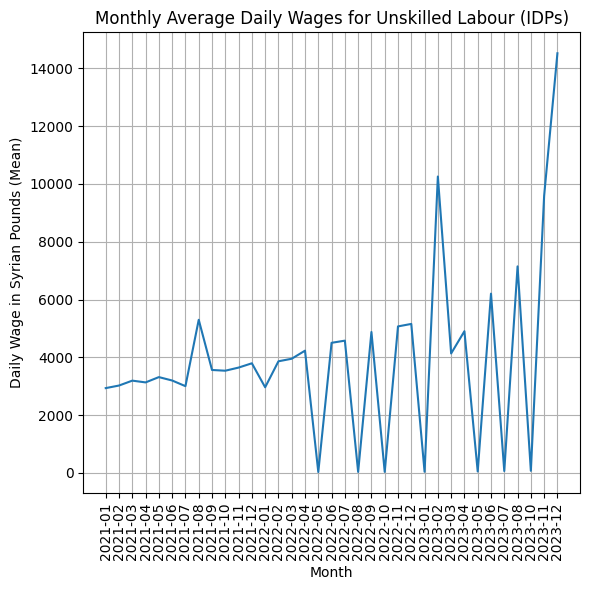

In [113]:
df_idp["Year-Month"] = pd.to_datetime(df_idp["Date"]).dt.to_period("M")

# Convert wage columns to numeric, setting non-convertible values to NaN
columns_to_convert = [
    'Estimated daily wage for unskilled labour for IDPs in the assessed community'
]
df_idp[columns_to_convert] = df_idp[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Aggregate the data by month and calculate the mean for the selected columns
monthly_avg_wages = df_idp.groupby("Year-Month")[columns_to_convert].mean()

# Reset index for plotting
monthly_avg_wages = monthly_avg_wages.reset_index()

# Plot the time series
plt.figure(figsize=(6, 6))

# Convert 'Month' to string for proper x-axis labels
x_labels = monthly_avg_wages['Year-Month'].dt.strftime('%Y-%m')

# Plot the data
plt.plot(x_labels, 
         monthly_avg_wages['Estimated daily wage for unskilled labour for IDPs in the assessed community'], 
         label='Daily Wage for IDPs')

plt.title('Monthly Average Daily Wages for Unskilled Labour (IDPs)')
plt.xlabel('Month')
plt.ylabel('Daily Wage in Syrian Pounds (Mean)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

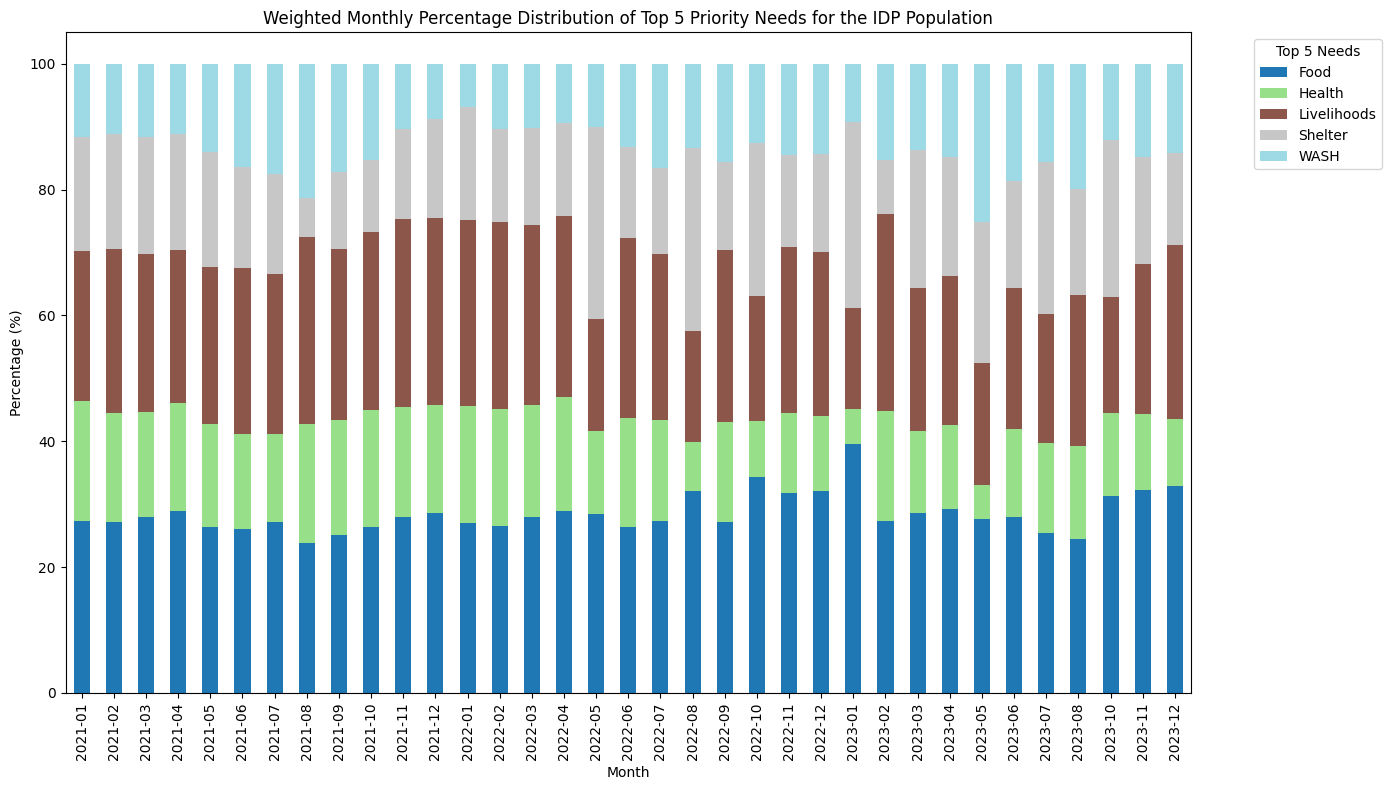

In [114]:
import pandas as pd

# Define priority columns
priority_columns = [
    "What was the top priority need for the IDP population in the assessed location?",
    "What was the second top priority need for the IDP population in the assessed location?",
    "What was the third top priority need for the IDP population in the assessed location?"
]

# Define weights for each priority level
weights = {"What was the top priority need for the IDP population in the assessed location?": 3,
           "What was the second top priority need for the IDP population in the assessed location?": 2,
           "What was the third top priority need for the IDP population in the assessed location?": 1}

# Melt the DataFrame to combine the priority columns into one
df_priority = df_idp.melt(
    id_vars=["Date"], 
    value_vars=priority_columns, 
    var_name="Priority Level", 
    value_name="Need"
)

# Map weights to each row
df_priority["Weight"] = df_priority["Priority Level"].map(weights)

# Group by Need to find the top 5 most frequent categories (considering weights)
weighted_counts = (
    df_priority.groupby("Need")["Weight"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_5_needs = weighted_counts.index

# Filter for only the top 5 needs
df_priority = df_priority[df_priority["Need"].isin(top_5_needs)]

# Group by month and need, then calculate weighted counts
df_priority["Year-Month"] = pd.to_datetime(df_priority["Date"]).dt.to_period("M")
priority_counts = df_priority.groupby(["Year-Month", "Need"])["Weight"].sum().unstack(fill_value=0)

# Normalize to percentages
priority_percentage = priority_counts.div(priority_counts.sum(axis=1), axis=0) * 100

# Plot Stacked Bar Chart
priority_percentage.plot(kind="bar", stacked=True, figsize=(14, 8), colormap="tab20")

plt.title("Weighted Monthly Percentage Distribution of Top 5 Priority Needs for the IDP Population")
plt.xlabel("Month")
plt.ylabel("Percentage (%)")
plt.legend(title="Top 5 Needs", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


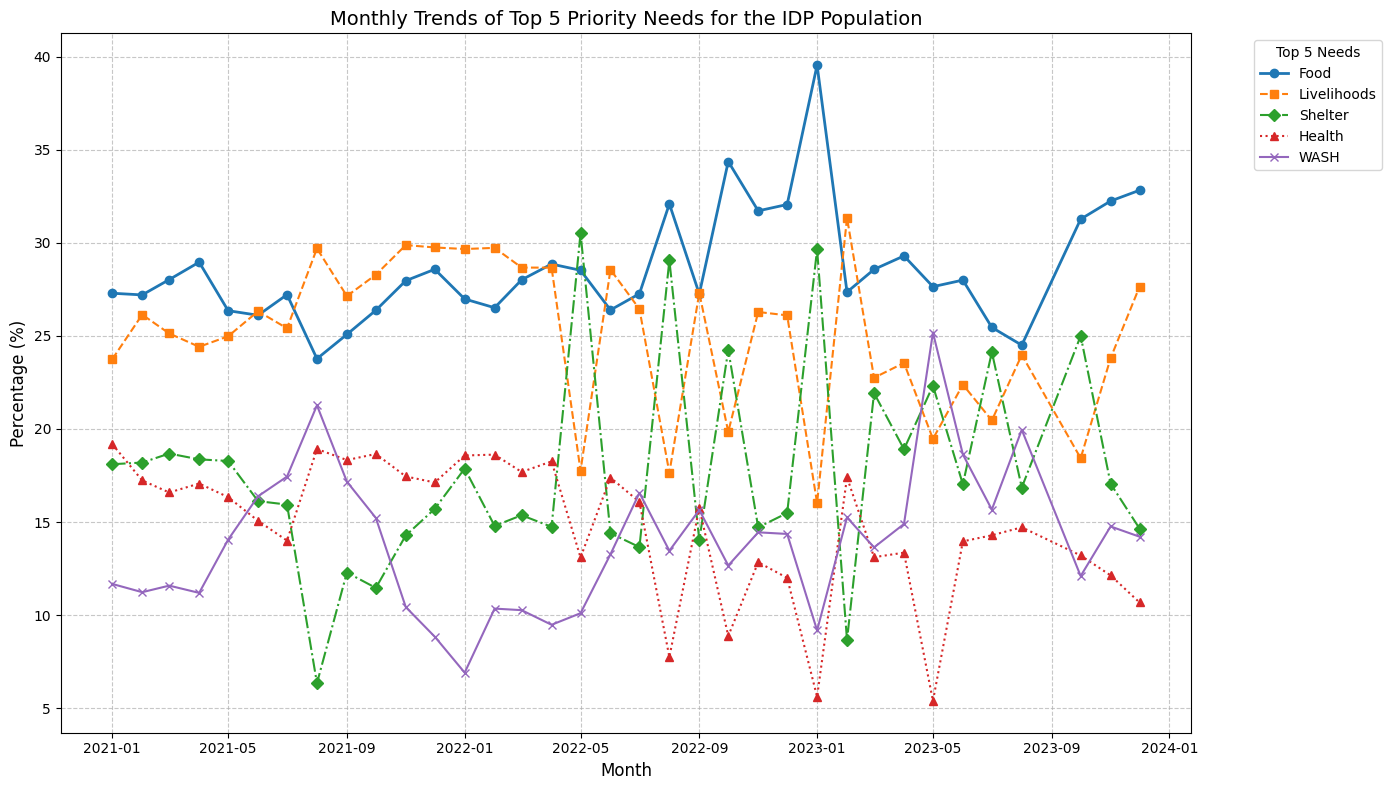

In [115]:

fig, ax = plt.subplots(figsize=(14, 8))

# Line styles and markers for each category
line_styles = ['-', '--', '-.', ':', '-']
markers = ['o', 's', 'D', '^', 'x']

for i, need in enumerate(top_5_needs):
    ax.plot(priority_percentage.index.to_timestamp(), 
            priority_percentage[need], 
            label=need, 
            linestyle=line_styles[i % len(line_styles)], 
            marker=markers[i % len(markers)], 
            linewidth=2 if i == 0 else 1.5)  # Highlight the first line

# Title and labels
ax.set_title("Monthly Trends of Top 5 Priority Needs for the IDP Population", fontsize=14)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Percentage (%)", fontsize=12)

# Move the legend outside the plot
ax.legend(title="Top 5 Needs", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)

# Grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


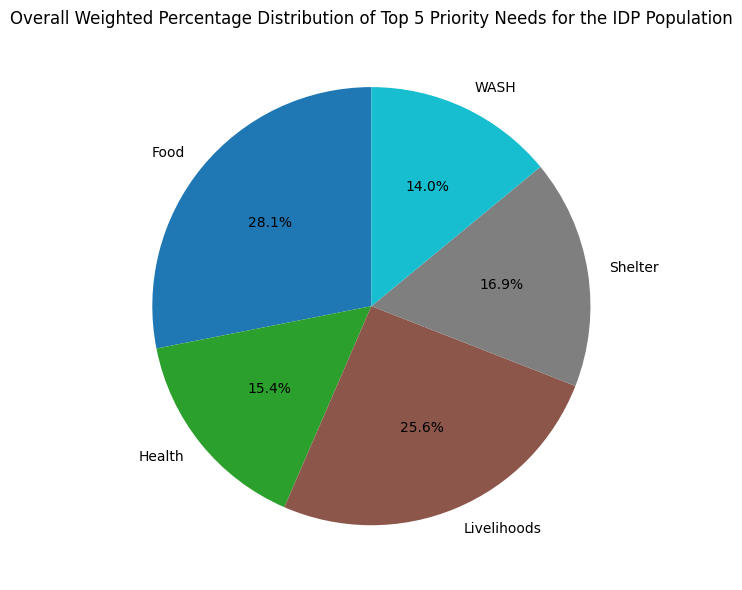

In [116]:
# Calculate weighted overall counts for each priority
overall_weighted_counts = df_priority.groupby("Need")["Weight"].sum()

# Filter for the top 5 needs based on weighted counts
top_5_overall_weighted = overall_weighted_counts[overall_weighted_counts.index.isin(top_5_needs)]

# Calculate percentages for the weighted counts
priority_percentage_overall_weighted = (top_5_overall_weighted / top_5_overall_weighted.sum()) * 100

# Plot pie chart for the weighted overall distribution
plt.figure(figsize=(6, 6))
priority_percentage_overall_weighted.plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    colormap="tab10", 
    labels=priority_percentage_overall_weighted.index
)

plt.title("Overall Weighted Percentage Distribution of Top 5 Priority Needs for the IDP Population")
plt.ylabel("")  # Remove y-axis label for better appearance
plt.tight_layout()
plt.show()



/var/folders/rb/r7y3v2dd5234_8hgs73ggvk40000gn/T/ipykernel_8126/717545851.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  challenge_percentage_top5["Other"] = other_challenges_percentage


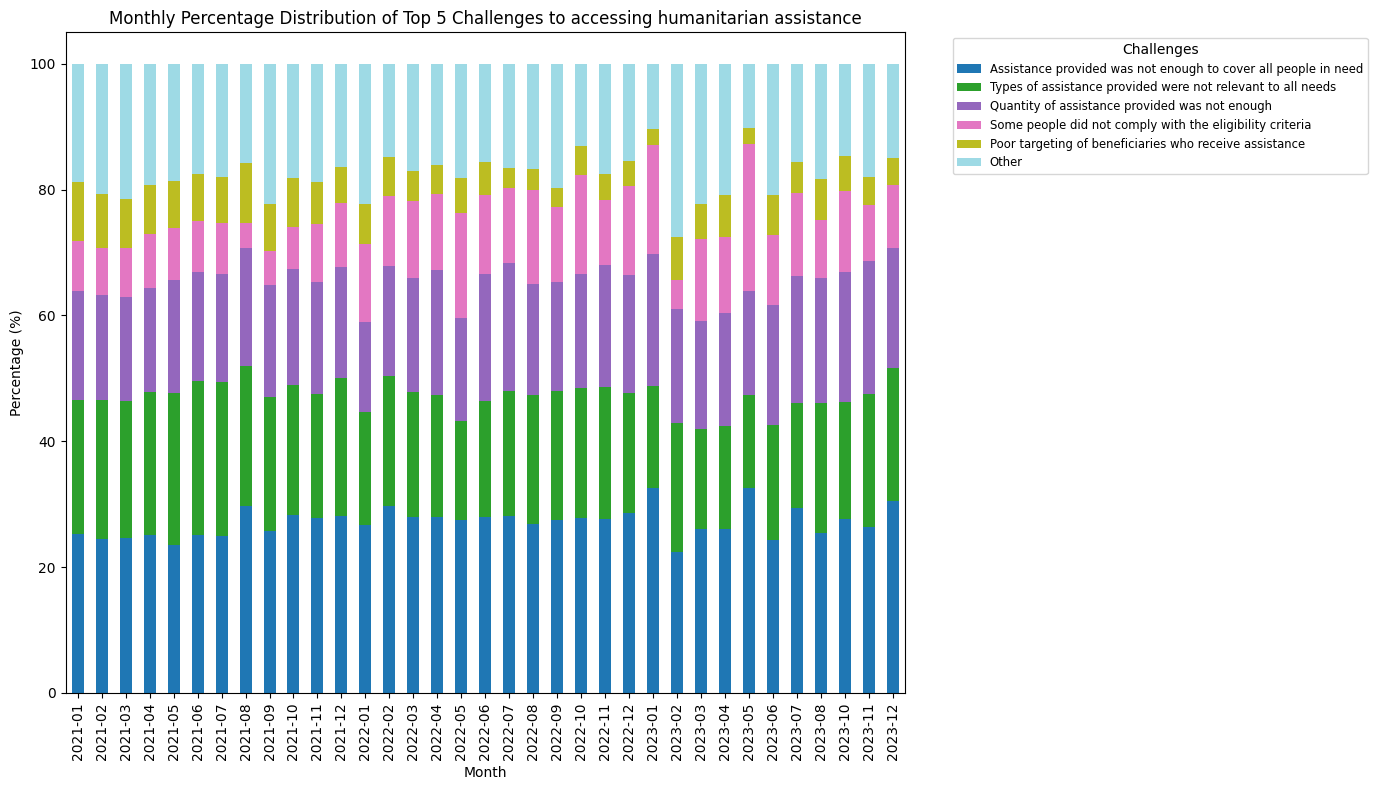

In [117]:
# Filter columns related to challenges to IDP and exclude non-numeric columns
challenge_columns = [
    col for col in df_idp.columns 
    if col.startswith("Challenges to accessing humanitarian assistance in the last 30 days for IDPs") and pd.api.types.is_numeric_dtype(df_idp[col])
]
# Group data by month and sum counts for each challenge type
challenge_data = df_idp.groupby("Year-Month")[challenge_columns].sum()

# Normalize assistance data to percentages
challenge_percentage = challenge_data.div(challenge_data.sum(axis=1), axis=0) * 100

# Sum counts for each challenge type across all months
total_challenges = challenge_data.sum()

# Sort challenges by total percentage and select the top 5
top_5_challenges = total_challenges.sort_values(ascending=False).head(5).index

# Filter the challenge_percentage DataFrame to include only the top 5 challenges
challenge_percentage_top5 = challenge_percentage[top_5_challenges]

# Calculate "Other" category as the remaining percentage
other_challenges_percentage = 100 - challenge_percentage_top5.sum(axis=1)

# Add "Other" category to the DataFrame
challenge_percentage_top5["Other"] = other_challenges_percentage

# Normalize each row to ensure percentages sum to 100
challenge_percentage_top5 = challenge_percentage_top5.div(challenge_percentage_top5.sum(axis=1), axis=0) * 100

# Simplify column names for better legend readability
simplified_labels = {
    col: col.split(" - ")[-1] for col in challenge_percentage_top5
}

# Rename columns for plotting purposes
challenge_percentage_top5 = challenge_percentage_top5.rename(columns=simplified_labels)
# Plot stacked bar chart
challenge_percentage_top5.plot(kind="bar", stacked=True, figsize=(14, 8), colormap="tab20")

# Customize the plot
plt.title("Monthly Percentage Distribution of Top 5 Challenges to accessing humanitarian assistance")
plt.xlabel("Month")
plt.ylabel("Percentage (%)")
plt.legend(title="Challenges", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize='small')
plt.tight_layout()
plt.show()



# Pie Charts for all categorical variable for 'category' : ['Humanitarian assistance']

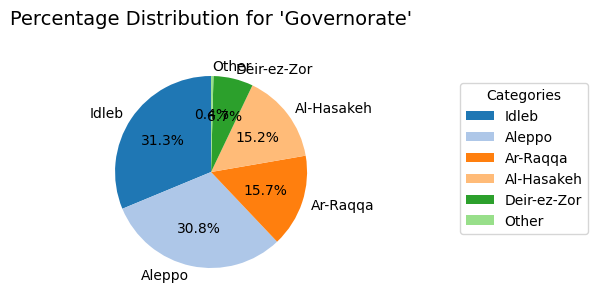

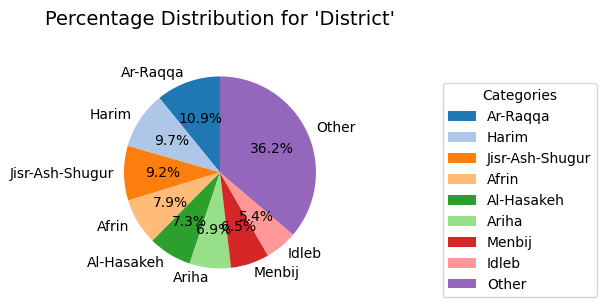

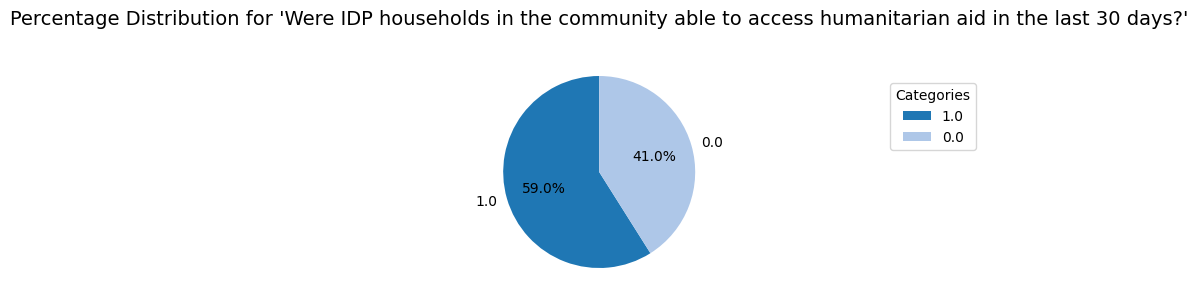

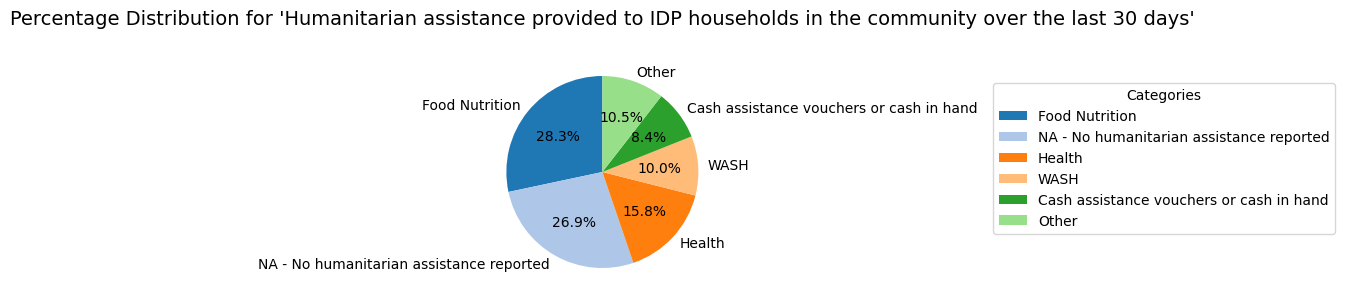

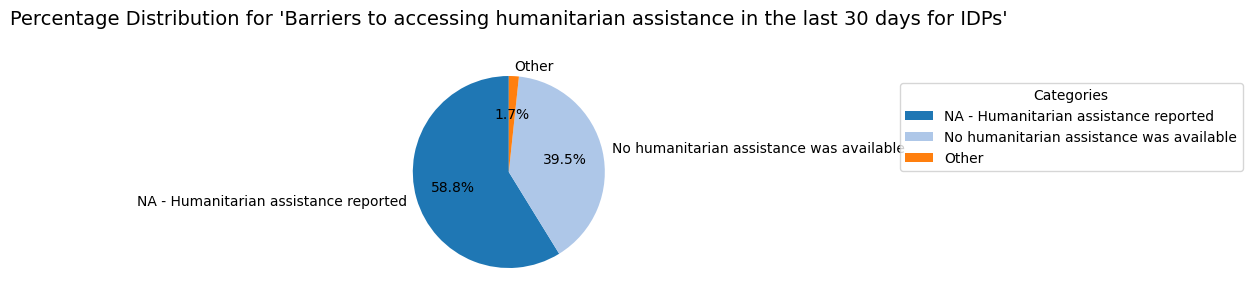

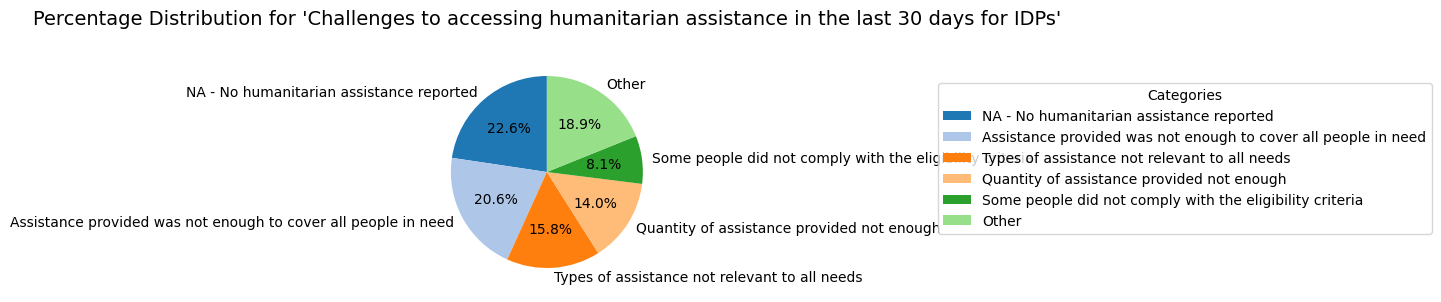

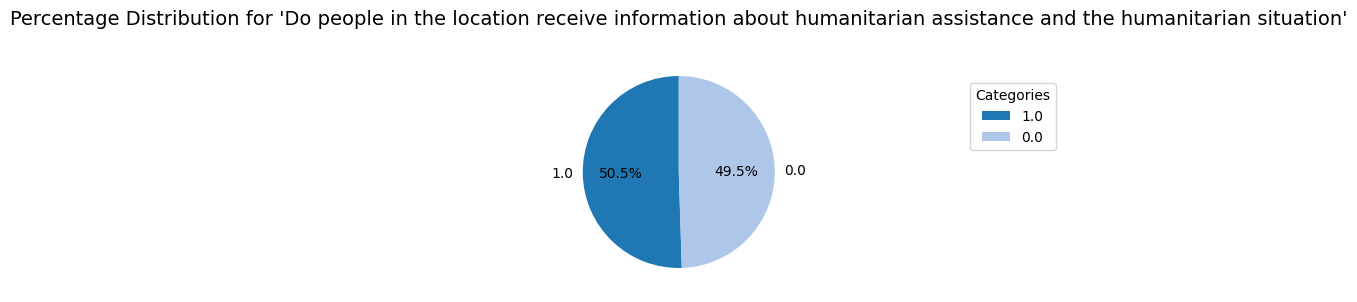

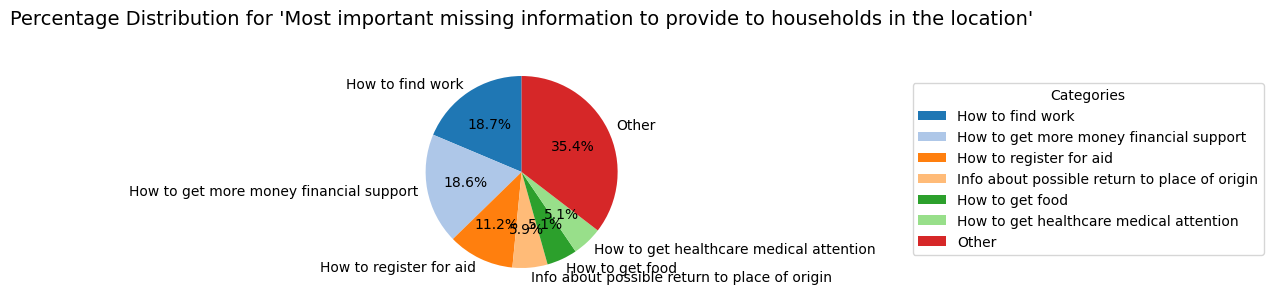

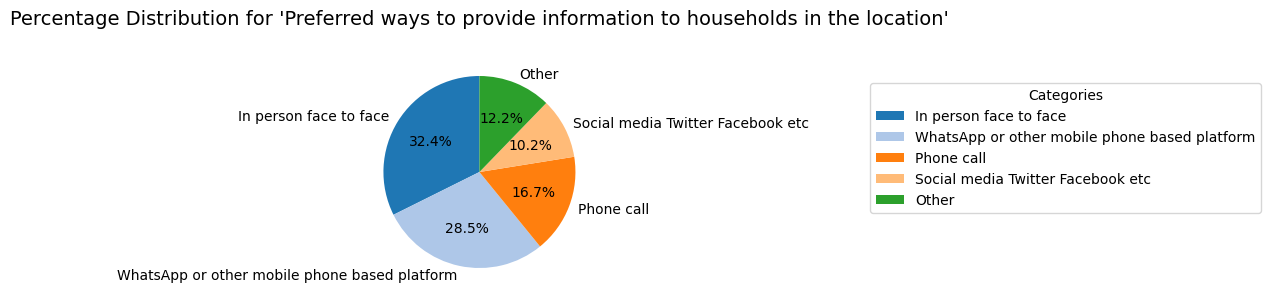

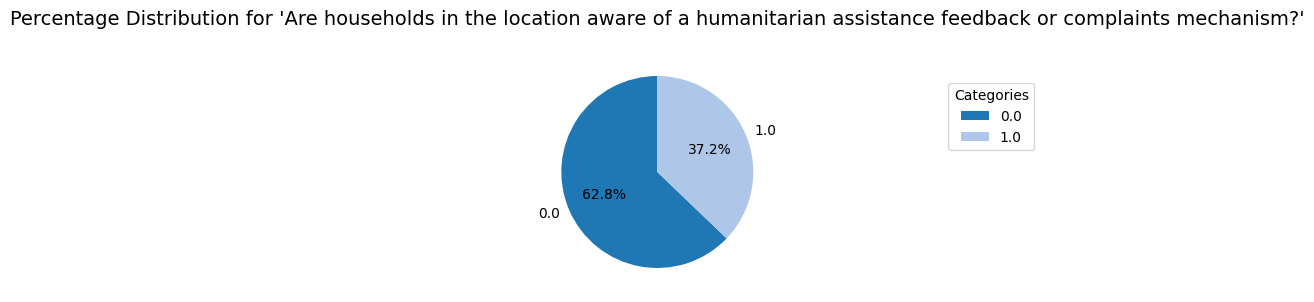

In [118]:
columns_to_process = [ 
    'Governorate', 
    'District', 
    'Were IDP households in the community able to access humanitarian aid in the last 30 days?',
    'Humanitarian assistance provided to IDP households in the community over the last 30 days',
    'Barriers to accessing humanitarian assistance in the last 30 days for IDPs',
    'Challenges to accessing humanitarian assistance in the last 30 days for IDPs',
    'Do people in the location receive information about humanitarian assistance and the humanitarian situation',
    'Most important missing information to provide to households in the location',
    'Preferred ways to provide information to households in the location',
    'Are households in the location aware of a humanitarian assistance feedback or complaints mechanism?'
]

# Function to process and plot each column
def process_and_plot_column(column_name, df, threshold=5):
    # Check if the column contains comma-separated values
    if df[column_name].dtype == 'object':  # Only process strings for splitting
        split_values = df[column_name].dropna().str.split(',').explode().str.strip()
    else:
        split_values = df[column_name].dropna()

    # Count occurrences
    value_counts = split_values.value_counts()

    # Normalize to percentages
    value_percentages = (value_counts / value_counts.sum()) * 100

    # Group categories below the threshold into "Other"
    major_categories = value_percentages[value_percentages >= threshold]
    minor_categories = value_percentages[value_percentages < threshold]

    if not minor_categories.empty:
        major_categories["Other"] = minor_categories.sum()

    # Plot pie chart
    fig, ax = plt.subplots(figsize=(6,6))
    wedges, texts, autotexts = ax.pie(
        major_categories,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab20.colors[:len(major_categories)],
        labels=major_categories.index,
        textprops={'fontsize': 10}
    )

    # Format the chart title and legend
    ax.set_title(f"Percentage Distribution for '{column_name}'", fontsize=14, pad=20)
    ax.legend(
        loc='best',
        bbox_to_anchor=(2.1, 0.9),
        fontsize=10,
        title="Categories"
    )
    plt.subplots_adjust(left=4, right=5, top=0.5, bottom=0.1)
    plt.show()


# Process and plot each column
for column in columns_to_process:
    if column in df_idp.columns:  # Ensure the column exists in the DataFrame
        process_and_plot_column(column, df_idp)
    else:
        print(f"Column '{column}' not found in the DataFrame.")


# Target Variable Exploration

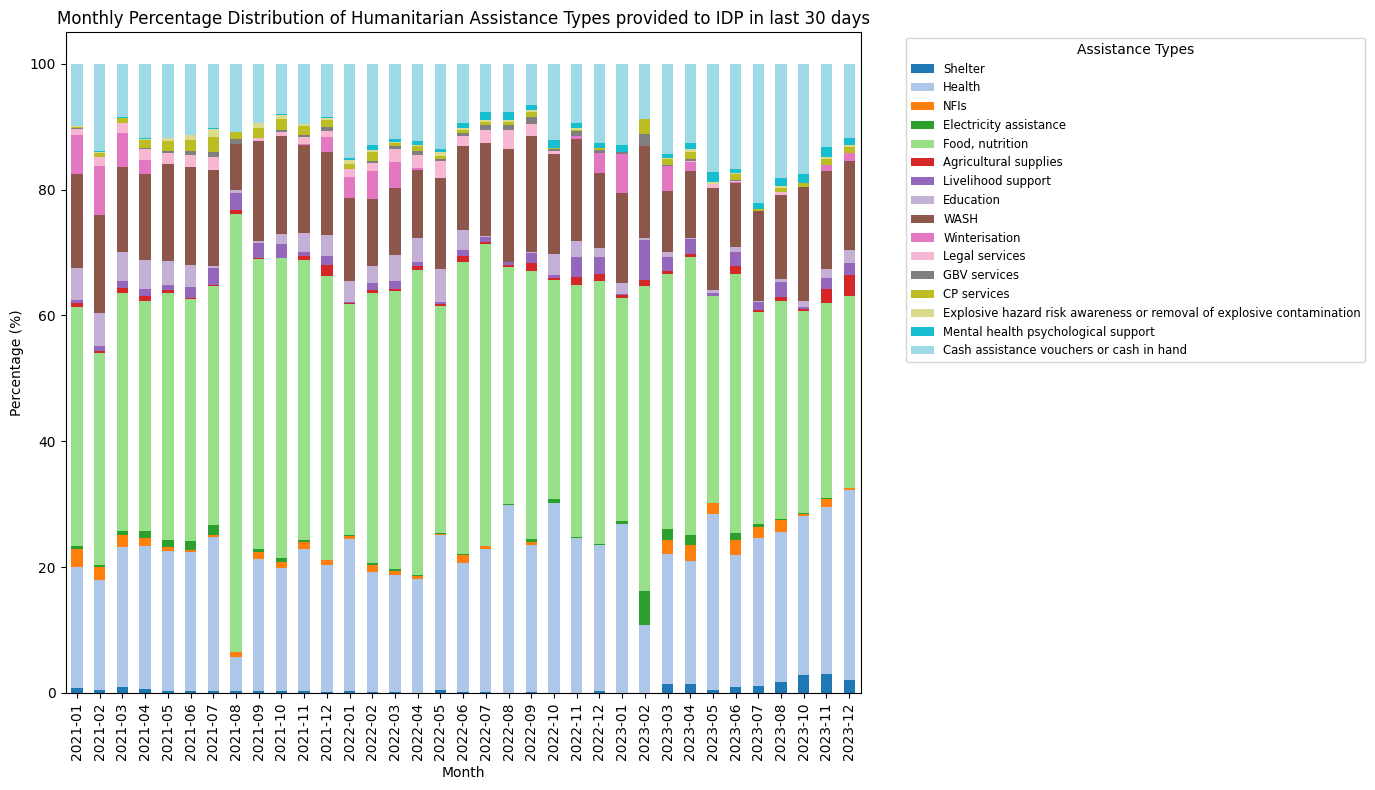

In [119]:
# Filter columns related to humanitarian assistance and exclude non-numeric columns
assistance_columns = [
    col for col in df_idp.columns 
    if col.startswith("Humanitarian assistance provided to IDP") and pd.api.types.is_numeric_dtype(df_idp[col])
]

# Group data by month and sum counts for each assistance type
assistance_data = df_idp.groupby("Year-Month")[assistance_columns].sum()

# Normalize assistance data to percentages
assistance_percentage = assistance_data.div(assistance_data.sum(axis=1), axis=0) * 100

# Simplify column names for better legend readability
simplified_labels = {
    col: col.split(" - ")[-1] for col in assistance_columns
}

# Rename columns for plotting purposes
assistance_percentage = assistance_percentage.rename(columns=simplified_labels)

# Plot stacked bar chart
assistance_percentage.plot(kind="bar", stacked=True, figsize=(14, 8), colormap="tab20")

plt.title("Monthly Percentage Distribution of Humanitarian Assistance Types provided to IDP in last 30 days")
plt.xlabel("Month")
plt.ylabel("Percentage (%)")
plt.legend(title="Assistance Types", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize='small')
plt.tight_layout()
plt.show()




In [120]:
criteria = {
            'group_type': ['All', 'IDP'],
            'normalized': [0],
            'category' : [
        'Humanitarian assistance']
        }
assistance_df = filter_main_df(df_idp, filter_df, criteria)
assistance_df.columns

Index(['Year', 'Month', 'Governorate', 'Governorate p-code', 'District',
       'District p-code', 'Sub-district', 'Sub-district p-code', 'Community',
       'Community p-code', 'UUID',
       'Were IDP households in the community able to access humanitarian aid in the last 30 days?',
       'Humanitarian assistance provided to IDP households in the community over the last 30 days',
       'Barriers to accessing humanitarian assistance in the last 30 days for IDPs',
       'Challenges to accessing humanitarian assistance in the last 30 days for IDPs',
       'Do people in the location receive information about humanitarian assistance and the humanitarian situation',
       'Most important missing information to provide to households in the location',
       'Preferred ways to provide information to households in the location',
       'Are households in the location aware of a humanitarian assistance feedback or complaints mechanism?'],
      dtype='object')

##  Using 16 columns (questions) with 0-1 response

In [121]:
df_idp[assistance_columns].columns

Index(['Humanitarian assistance provided to IDP households in the community over the last 30 days - Shelter',
       'Humanitarian assistance provided to IDP households in the community over the last 30 days - Health',
       'Humanitarian assistance provided to IDP households in the community over the last 30 days - NFIs',
       'Humanitarian assistance provided to IDP households in the community over the last 30 days - Electricity assistance',
       'Humanitarian assistance provided to IDP households in the community over the last 30 days - Food, nutrition',
       'Humanitarian assistance provided to IDP households in the community over the last 30 days - Agricultural supplies',
       'Humanitarian assistance provided to IDP households in the community over the last 30 days - Livelihood support',
       'Humanitarian assistance provided to IDP households in the community over the last 30 days - Education',
       'Humanitarian assistance provided to IDP households in the communit

In [122]:
# Simplify column names for legend readability
simplified_labels = {col: col.split(" - ")[-1].strip() for col in assistance_columns}

# Replace column names with simplified labels
df_assistance = df_idp[assistance_columns].rename(columns=simplified_labels)

# Calculate the sum of 0s and 1s
assistance_summary = df_assistance.apply(pd.Series.value_counts).astype(int)

# Transpose and rename columns for better readability
assistance_summary = assistance_summary.T
assistance_summary.columns = ["Count of 0s", "Count of 1s"]

# Display the result
print(assistance_summary)


                                                    Count of 0s  Count of 1s
Shelter                                                   32683          229
Health                                                    24959         7953
NFIs                                                      32521          391
Electricity assistance                                    32672          240
Food, nutrition                                           18678        14234
Agricultural supplies                                     32665          247
Livelihood support                                        32396          516
Education                                                 32014          898
WASH                                                      27897         5015
Winterisation                                             32257          655
Legal services                                            32513          399
GBV services                                              32782          130

# Time Series Analysis

In [123]:
df_idp[assistance_columns].columns

Index(['Humanitarian assistance provided to IDP households in the community over the last 30 days - Shelter',
       'Humanitarian assistance provided to IDP households in the community over the last 30 days - Health',
       'Humanitarian assistance provided to IDP households in the community over the last 30 days - NFIs',
       'Humanitarian assistance provided to IDP households in the community over the last 30 days - Electricity assistance',
       'Humanitarian assistance provided to IDP households in the community over the last 30 days - Food, nutrition',
       'Humanitarian assistance provided to IDP households in the community over the last 30 days - Agricultural supplies',
       'Humanitarian assistance provided to IDP households in the community over the last 30 days - Livelihood support',
       'Humanitarian assistance provided to IDP households in the community over the last 30 days - Education',
       'Humanitarian assistance provided to IDP households in the communit

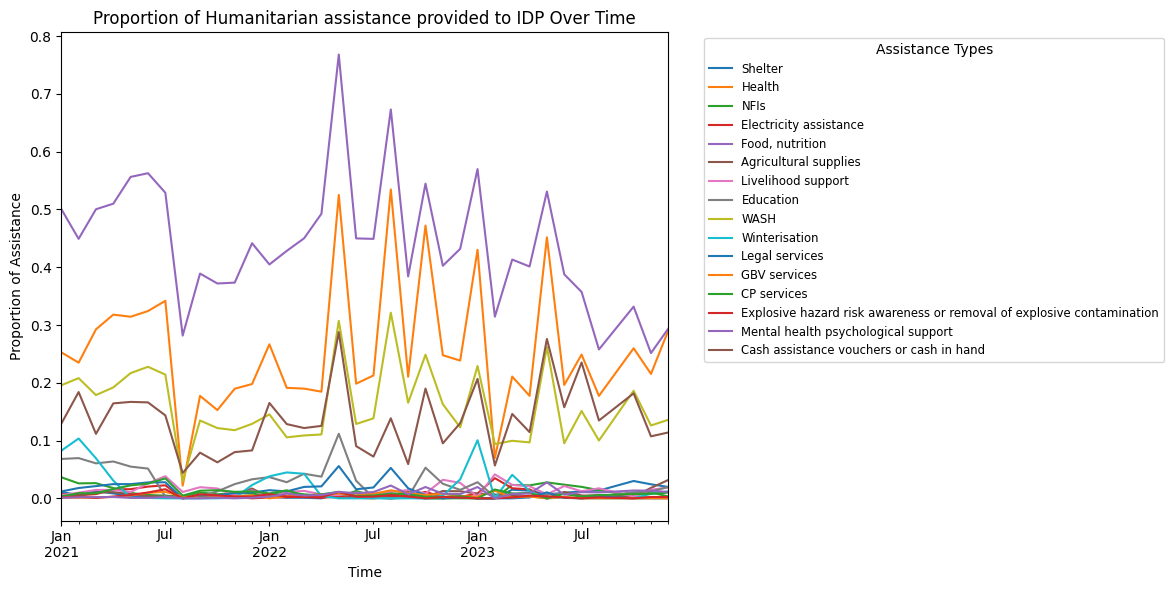

In [124]:
# Group by Month and calculate mean (proportion)
df_time_series = df_idp.groupby("Year-Month")[assistance_columns].mean()

# Simplify column names for legend readability
simplified_labels = {col: col.split(" - ")[-1] for col in assistance_columns}
df_time_series = df_time_series.rename(columns=simplified_labels)

# Plot line chart
df_time_series.plot(kind='line', figsize=(12, 6))
plt.title("Proportion of Humanitarian assistance provided to IDP Over Time")
plt.xlabel("Time")
plt.ylabel("Proportion of Assistance")
plt.legend(title="Assistance Types", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize='small')
plt.tight_layout()
plt.show()


In [125]:
from statsmodels.tsa.stattools import adfuller

# Initialize a dictionary to store ADF test results
adf_results = {}

# Perform ADF test for each column in the time series
for column in df_time_series.columns:
    series = df_time_series[column].dropna()
    result = adfuller(series, autolag='AIC')
    adf_results[column] = {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Values': result[4]
    }

# Convert the results into a DataFrame for better readability
adf_results_df = pd.DataFrame.from_dict(adf_results, orient='index')

# Display the ADF results
print("Augmented Dickey-Fuller Test Results:")
print(adf_results_df)


Augmented Dickey-Fuller Test Results:
                                                    ADF Statistic  \
Shelter                                                  0.606024   
Health                                                  -6.787690   
NFIs                                                    -3.163901   
Electricity assistance                                  -3.305519   
Food, nutrition                                         -1.386731   
Agricultural supplies                                   -2.436667   
Livelihood support                                      -2.573056   
Education                                               -3.297212   
WASH                                                    -5.951471   
Winterisation                                           -4.047413   
Legal services                                          -3.188952   
GBV services                                            -3.325105   
CP services                                             -3.602950

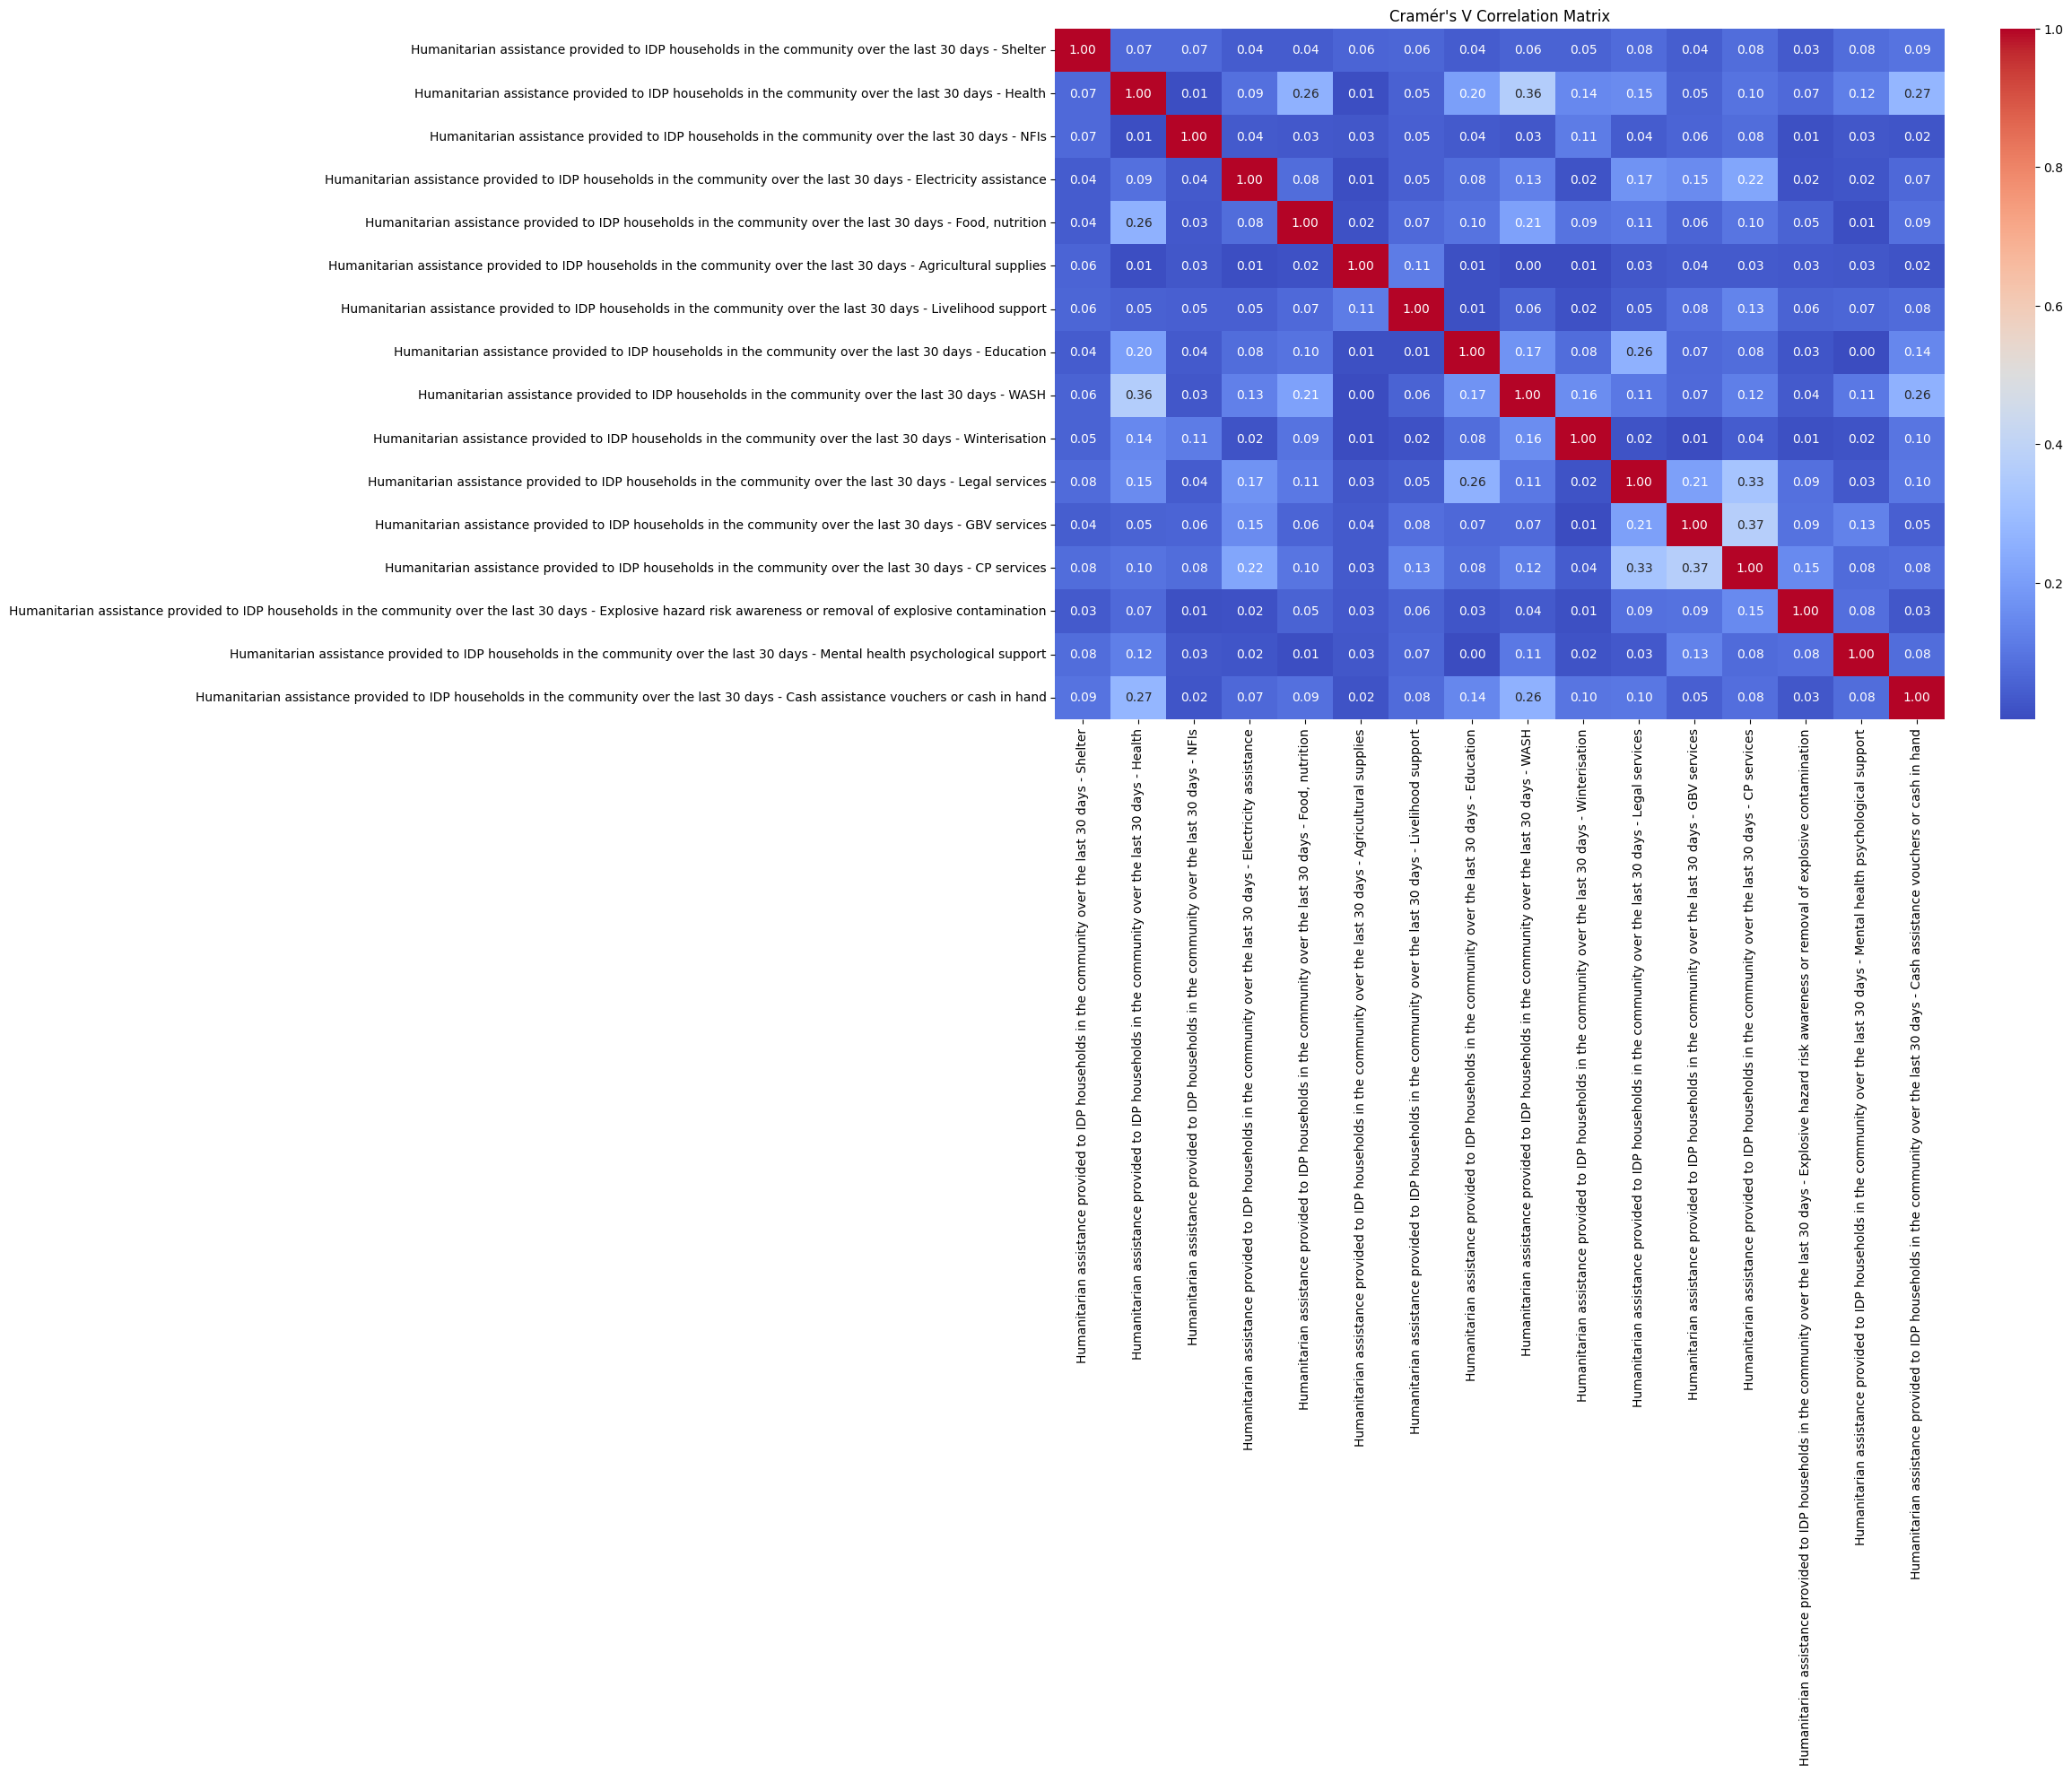

In [126]:
from scipy.stats import chi2_contingency

# Cramér's V 
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Korelasyon matrisini oluştur
columns = assistance_columns
correlation_matrix = pd.DataFrame(index=columns, columns=columns)

for col1 in columns:
    for col2 in columns:
        if col1 == col2:
            correlation_matrix.loc[col1, col2] = 1  # Kendiyle ilişki
        else:
            correlation_matrix.loc[col1, col2] = cramers_v(df_idp[col1], df_idp[col2])


correlation_matrix = correlation_matrix.astype(float)

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Cramér's V Correlation Matrix")
plt.xticks(rotation=90)
plt.show()


# Missing Values

In [127]:
# Define thresholds
thresholds = [0.5, 0.4, 0.3, 0.2, 0.1]

# Calculate missing proportions for each column
missing_ratios = df_idp.isna().mean()

# Count columns for each threshold
threshold_counts = {threshold: (missing_ratios >= threshold).sum() for threshold in thresholds}

# Total column count
total_columns = df_idp.shape[1]

# Print results with detailed explanation
print("Missing Value Analysis:")
print("=" * 30)
for threshold, count in threshold_counts.items():
    percentage = int(threshold * 100)
    print(f"- {count} out of {total_columns} columns ({(count / total_columns) * 100:.2f}%) "
          f"have at least {percentage}% missing values.")


Missing Value Analysis:
- 63 out of 1133 columns (5.56%) have at least 50% missing values.
- 95 out of 1133 columns (8.38%) have at least 40% missing values.
- 164 out of 1133 columns (14.47%) have at least 30% missing values.
- 189 out of 1133 columns (16.68%) have at least 20% missing values.
- 190 out of 1133 columns (16.77%) have at least 10% missing values.


## Target values missing

In [128]:
# Calculate the percentage of missing values for assistance_columns
missing_total = df_idp[assistance_columns].isna().sum()

# Create a sorted DataFrame for better readability
missing_df = missing_total.reset_index()
missing_df.columns = ['Column', 'Missing #']

# Display the missing percentages
print(missing_df)


                                               Column  Missing #
0   Humanitarian assistance provided to IDP househ...         53
1   Humanitarian assistance provided to IDP househ...         53
2   Humanitarian assistance provided to IDP househ...         53
3   Humanitarian assistance provided to IDP househ...         53
4   Humanitarian assistance provided to IDP househ...         53
5   Humanitarian assistance provided to IDP househ...         53
6   Humanitarian assistance provided to IDP househ...         53
7   Humanitarian assistance provided to IDP househ...         53
8   Humanitarian assistance provided to IDP househ...         53
9   Humanitarian assistance provided to IDP househ...         53
10  Humanitarian assistance provided to IDP househ...         53
11  Humanitarian assistance provided to IDP househ...         53
12  Humanitarian assistance provided to IDP househ...         53
13  Humanitarian assistance provided to IDP househ...         53
14  Humanitarian assistan

In [129]:
df_idp[assistance_columns].shape

(32965, 16)

In [130]:
# Drop rows with missing values in any of the assistance_columns
df_idp = df_idp.dropna(subset=assistance_columns)

print(f"Cleaned number of rows: {df_idp.shape[0]}")


Cleaned number of rows: 32912


# Finalize HSOS IDP Data for Modeling

In [131]:
criteria_categoric = {
            'group_type': ['All', 'IDP'],
            'normalized': [0],
            'category':   [
        'Humanitarian assistance',
        'WASH',
        'Infrastructure',
        'Shelter',
        'Education',
        'Livelihoods',
        'Health',
        'Food security',
        'Assessed communities',
        'Protection',
        'Demographics',
        'NFIs',
        'Priority Needs'
    ]
        }

In [132]:
normalized_0_data = filter_main_df(df_idp, filter_df, criteria_categoric, None)

In [133]:
categorical_unique_values = {
    col: normalized_0_data[col].dropna().unique().tolist() for col in normalized_0_data.select_dtypes(include=['object']).columns
}

# Convert the dictionary to a DataFrame for better readability
unique_values_df = pd.DataFrame(list(categorical_unique_values.items()), columns=["Column", "Unique Values"])

# Save to Excel
output_path = "/Users/bercinersoz/Desktop/Categorical_Unique_Values_2.xlsx"
unique_values_df.to_excel(output_path, index=False)

print(f"Unique values for categorical data have been saved to: {output_path}")


Unique values for categorical data have been saved to: /Users/bercinersoz/Desktop/Categorical_Unique_Values_2.xlsx


In [134]:
# Define columns to exclude
columns_to_keep = [
    'Year', 'Month', 'Governorate', 'Governorate p-code', 'District',
    'District p-code', 'Sub-district', 'Sub-district p-code', 'Community',
    'Community p-code'
]

# Filter only object columns from normalized_0_data
categoric_data = normalized_0_data.select_dtypes(include=['object'])

# Remove specified columns from categoric_data
categoric_data = categoric_data.drop(columns=columns_to_keep, errors='ignore')

# Remove the same columns from df_idp
df_idp_cleaned = df_idp.drop(columns=categoric_data.columns, errors='ignore')

# Save dropped object columns with unique values
categoric_data_columns_and_uniques = pd.DataFrame({
    "Column Name": categoric_data.columns,
    "Unique Values": [list(normalized_0_data[col].dropna().unique()) for col in categoric_data.columns]
})

# Save to Excel
output_path = "/Users/bercinersoz/Desktop/categoric_data_from_filter_module.xlsx"
categoric_data_columns_and_uniques.to_excel(output_path, index=False)

print(f"Dropped categoric columns and unique values saved to: {output_path}")

# Output the shapes of the filtered dataframes for confirmation
print(f"categoric_data shape: {categoric_data.shape}")
print(f"df_idp_cleaned shape: {df_idp_cleaned.shape}")


Dropped categoric columns and unique values saved to: /Users/bercinersoz/Desktop/categoric_data_from_filter_module.xlsx
categoric_data shape: (32912, 61)
df_idp_cleaned shape: (32912, 1072)


In [135]:
"""# Get the names of columns with object data type
object_columns = df_idp_cleaned.select_dtypes(include=['object']).columns.tolist()

# Identify columns that contain "- Other"
other_columns = [col for col in object_columns if "- Other" in col]

# Remove these columns from the list of object columns
filtered_object_columns = [col for col in object_columns if col not in other_columns]

# Display the results
print("Columns with object data type (excluding '- Other'):", filtered_object_columns)
"""



'# Get the names of columns with object data type\nobject_columns = df_idp_cleaned.select_dtypes(include=[\'object\']).columns.tolist()\n\n# Identify columns that contain "- Other"\nother_columns = [col for col in object_columns if "- Other" in col]\n\n# Remove these columns from the list of object columns\nfiltered_object_columns = [col for col in object_columns if col not in other_columns]\n\n# Display the results\nprint("Columns with object data type (excluding \'- Other\'):", filtered_object_columns)\n'

In [136]:
"""# Iterate through each column and print unique values
for col in filtered_object_columns:
    unique_values = df_idp_cleaned[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")
    """


'# Iterate through each column and print unique values\nfor col in filtered_object_columns:\n    unique_values = df_idp_cleaned[col].unique()\n    print(f"Unique values in column \'{col}\': {unique_values}")\n    '

In [137]:
# Drop the 'Year-Month' column from df_idp_cleaned
df_idp_cleaned = df_idp_cleaned.drop(columns=['Year-Month', 'Date'], errors='ignore')



# Step 2: Remained Object type in df_idp_cleaned

In [138]:
# Remove unwanted object columns
object_columns_to_drop = [
    col for col in df_idp_cleaned.select_dtypes(include=['object']).columns
    if col not in columns_to_keep  # columns_to_keep is predefined
]

# Save dropped object columns with unique values
object_columns_and_uniques = pd.DataFrame({
    "Column Name": object_columns_to_drop,
    "Unique Values": [list(df_idp_cleaned[col].dropna().unique()) for col in object_columns_to_drop]
})

# Save to Excel
output_path = "/Users/bercinersoz/Desktop/dropped_object_columns_and_uniques.xlsx"
object_columns_and_uniques.to_excel(output_path, index=False)

print(f"Dropped object columns and unique values saved to: {output_path}")




Dropped object columns and unique values saved to: /Users/bercinersoz/Desktop/dropped_object_columns_and_uniques.xlsx


In [139]:
# Drop the identified object columns
df_idp_cleaned = df_idp_cleaned.drop(columns=object_columns_to_drop, errors='ignore')

# Final verification
print("Remaining columns in df_idp_cleaned:")
print(df_idp_cleaned.shape)



Remaining columns in df_idp_cleaned:
(32912, 981)


In [140]:
# Save column names and unique values to a DataFrame
columns_and_uniques = pd.DataFrame({
    "Column Name": df_idp_cleaned.columns,
    "Unique Values": [df_idp_cleaned[col].unique() for col in df_idp_cleaned.columns]
})

# Save the DataFrame to an Excel file on the desktop
output_path = "/Users/bercinersoz/Desktop/df_idp_cleaned_columns_and_uniques.xlsx"
columns_and_uniques.to_excel(output_path, index=False)

print(f"Column names and unique values saved to: {output_path}")


Column names and unique values saved to: /Users/bercinersoz/Desktop/df_idp_cleaned_columns_and_uniques.xlsx


In [141]:
import os

output_path = "/Users/bercinersoz/Desktop/HSOS_idp_cleaned.xlsx"

df_idp_cleaned.to_excel(output_path, index=False)






In [142]:
df_idp_cleaned.to_csv("/Users/bercinersoz/Desktop/HSOS_idp_cleaned.csv", index=False)

# Correlations

In [143]:
# Drop excluded columns and keep only numeric columns
X = df_idp_cleaned.drop(columns=assistance_columns)

X_numeric = X.select_dtypes(include=[np.number])




In [144]:
X_numeric.columns

Index(['Year', 'Month', 'Returnees reported in the community',
       'Three most common IDP shelter types - Solid finished apartment',
       'Three most common IDP shelter types - Hotel',
       'Three most common IDP shelter types - Unfinished or abandoned residential building',
       'Three most common IDP shelter types - Damaged residential building',
       'Three most common IDP shelter types - Non residential structure with one family',
       'Three most common IDP shelter types - Collective center with more than one family',
       'Three most common IDP shelter types - Concrete block shelter',
       ...
       'What was the third top priority need for the IDP population in the assessed location?_Infrustructure',
       'What was the third top priority need for the IDP population in the assessed location?_Livelihoods',
       'What was the third top priority need for the IDP population in the assessed location?_Money / Cash',
       'What was the third top priority need for

In [145]:
X_numeric = X_numeric.drop(columns=['Year', 'Month'], errors='ignore')

X_filled = X_numeric.apply(lambda col: col.fillna(col.mode()[0]) if not col.mode().empty else col)

In [146]:
# Target (0-1 matrix)
Y = df_idp_cleaned[assistance_columns]

# Check the shapes to ensure alignment
print(f"Shape of X_filled: {X_filled.shape}")
print(f"Shape of Y: {Y.shape}")


Shape of X_filled: (32912, 955)
Shape of Y: (32912, 16)


In [147]:
from scipy.stats import chi2_contingency

# Perform Chi-Square test and summarize results in a tabular format
chi2_results = pd.DataFrame(index=X_filled.columns, columns=Y.columns)
p_value_results = pd.DataFrame(index=X_filled.columns, columns=Y.columns)

# Chi-Square Test for each X-Y pair
for x_col in X_filled.columns:
    for y_col in Y.columns:
        contingency_table = pd.crosstab(X_filled[x_col], Y[y_col])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        chi2_results.loc[x_col, y_col] = chi2
        p_value_results.loc[x_col, y_col] = p

# Print top features with concise formatting
for y_col in Y.columns:
    # Combine Chi2 and p-values into a summary DataFrame
    result_df = pd.DataFrame({
        'Feature': X_filled.columns,
        'Chi2': chi2_results[y_col].astype(float),
        'p-value': p_value_results[y_col].astype(float)
    })
    # Select top 5 features based on p-value
    top_features = result_df.nsmallest(5, 'p-value').reset_index(drop=True)
    
    # Simplify variable names for better readability
    top_features['Feature'] = top_features['Feature'].apply(lambda x: x[:30] + '...' + x[-30:] if len(x) > 60 else x)

    # Display as a table
    print(f"Top Features for Target: {y_col}")
    print(top_features.to_string(index=False))
    print("\n" + "-"*60 + "\n")


Top Features for Target: Humanitarian assistance provided to IDP households in the community over the last 30 days - Shelter
                                                        Feature       Chi2       p-value
IDP groups affected by protect...roups affected - Girls 0 to 11 824.222432 2.922573e-181
IDP groups affected by protect...groups affected - Boys 0 to 11 784.151348 1.506213e-172
Estimated daily wage for unski...IDPs in the assessed community 971.019532 8.000824e-125
Most common other location whe...ast 30 days - District_Encoded 545.534741 2.254010e-101
                                               District_Encoded 531.382519  2.052850e-98

------------------------------------------------------------

Top Features for Target: Humanitarian assistance provided to IDP households in the community over the last 30 days - Health
                                                        Feature        Chi2  p-value
                     Three most common IDP shelter types - Tent 1591.

In [148]:
from scipy.stats import chi2_contingency

# Perform Chi-Square test and summarize results in a tabular format
chi2_results = pd.DataFrame(index=X_filled.columns, columns=Y.columns)
p_value_results = pd.DataFrame(index=X_filled.columns, columns=Y.columns)

# Chi-Square Test for each X-Y pair
for x_col in X_filled.columns:
    for y_col in Y.columns:
        contingency_table = pd.crosstab(X_filled[x_col], Y[y_col])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        chi2_results.loc[x_col, y_col] = chi2
        p_value_results.loc[x_col, y_col] = p

# Print least significant features with concise formatting
for y_col in Y.columns:
    # Combine Chi2 and p-values into a summary DataFrame
    result_df = pd.DataFrame({
        'Feature': X_filled.columns,
        'Chi2': chi2_results[y_col].astype(float),
        'p-value': p_value_results[y_col].astype(float)
    })
    # Select bottom 5 features based on p-value (highest p-values)
    least_significant_features = result_df.nlargest(5, 'p-value').reset_index(drop=True)
    
    # Simplify variable names for better readability
    least_significant_features['Feature'] = least_significant_features['Feature'].apply(lambda x: x[:30] + '...' + x[-30:] if len(x) > 60 else x)

    # Display as a table
    print(f"Least Significant Features for Target: {y_col}")
    print(least_significant_features.to_string(index=False))
    print("\n" + "-"*60 + "\n")


Least Significant Features for Target: Humanitarian assistance provided to IDP households in the community over the last 30 days - Shelter
                                                        Feature  Chi2  p-value
                    Three most common IDP shelter types - Hotel   0.0      1.0
Three most common IDP shelter ...tial structure with one family   0.0      1.0
Three most common IDP shelter ...nter with more than one family   0.0      1.0
   Three most common IDP shelter types - Concrete block shelter   0.0      1.0
                Three most common IDP shelter types - Container   0.0      1.0

------------------------------------------------------------

Least Significant Features for Target: Humanitarian assistance provided to IDP households in the community over the last 30 days - Health
                                                        Feature  Chi2  p-value
                    Three most common IDP shelter types - Hotel   0.0      1.0
Three most common IDP shelte

In [149]:
from scipy.stats import chi2_contingency

# Perform Chi-Square test and summarize results in a tabular format
chi2_results = pd.DataFrame(index=X_filled.columns, columns=Y.columns)
p_value_results = pd.DataFrame(index=X_filled.columns, columns=Y.columns)

# Chi-Square Test for each X-Y pair
for x_col in X_filled.columns:
    for y_col in Y.columns:
        contingency_table = pd.crosstab(X_filled[x_col], Y[y_col])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        chi2_results.loc[x_col, y_col] = chi2
        p_value_results.loc[x_col, y_col] = p

# Prepare summary table
data = []
for y_col in Y.columns:
    # Extract important and unimportant feature counts
    important_count = (p_value_results[y_col].astype(float) < 0.05).sum()
    unimportant_count = (p_value_results[y_col].astype(float) >= 0.05).sum()

    # Extract simplified Y column name
    simplified_y = y_col.split(" - ")[-1][:21]

    # Append row to data
    data.append([simplified_y, important_count, unimportant_count])

# Create summary DataFrame
summary_df = pd.DataFrame(data, columns=[
    "Humanitarian assistance Categories to IDPs",
    "Important Feature Relations",
    "Unimportant Feature Relations"
])

# Display the summary DataFrame

print(summary_df.to_string(index=False, justify="center"))


Humanitarian assistance Categories to IDPs  Important Feature Relations  Unimportant Feature Relations
                        Shelter                        384                           571              
                         Health                        710                           245              
                           NFIs                        402                           553              
          Electricity assistanc                        464                           491              
                Food, nutrition                        701                           254              
          Agricultural supplies                        296                           659              
             Livelihood support                        460                           495              
                      Education                        571                           384              
                           WASH                        687               

In [150]:
"""from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_filled.columns
vif_data["VIF"] = [variance_inflation_factor(X_filled.values, i) for i in range(X_filled.shape[1])]

# Sort by VIF value
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# Display features with the highest multicollinearity
print("Features with the highest VIF values:")
print(vif_data)

# Save the VIF data to an Excel file for better analysis
output_path = "/Users/bercinersoz/Desktop/VIF_Analysis.xlsx"
vif_data.to_excel(output_path, index=False)

print(f"VIF analysis saved to: {output_path}")"""


'from statsmodels.stats.outliers_influence import variance_inflation_factor\n\n# Calculate VIF for each feature\nvif_data = pd.DataFrame()\nvif_data["Feature"] = X_filled.columns\nvif_data["VIF"] = [variance_inflation_factor(X_filled.values, i) for i in range(X_filled.shape[1])]\n\n# Sort by VIF value\nvif_data = vif_data.sort_values(by="VIF", ascending=False)\n\n# Display features with the highest multicollinearity\nprint("Features with the highest VIF values:")\nprint(vif_data)\n\n# Save the VIF data to an Excel file for better analysis\noutput_path = "/Users/bercinersoz/Desktop/VIF_Analysis.xlsx"\nvif_data.to_excel(output_path, index=False)\n\nprint(f"VIF analysis saved to: {output_path}")'

# Missing Value Analysis for X_numeric

In [151]:
# Define thresholds
thresholds = [0.5, 0.4, 0.3, 0.2, 0.1]

# Calculate missing proportions for each column
missing_ratios = X_numeric.isna().mean()

# Count columns for each threshold
threshold_counts = {threshold: (missing_ratios >= threshold).sum() for threshold in thresholds}

# Total column count
total_columns = X_numeric.shape[1]

# Print results with detailed explanation
print("Missing Value Analysis:")
print("=" * 30)
for threshold, count in threshold_counts.items():
    percentage = int(threshold * 100)
    print(f"- {count} out of {total_columns} columns ({(count / total_columns) * 100:.2f}%) "
          f"have at least {percentage}% missing values.")


Missing Value Analysis:
- 59 out of 955 columns (6.18%) have at least 50% missing values.
- 89 out of 955 columns (9.32%) have at least 40% missing values.
- 151 out of 955 columns (15.81%) have at least 30% missing values.
- 169 out of 955 columns (17.70%) have at least 20% missing values.
- 170 out of 955 columns (17.80%) have at least 10% missing values.


In [152]:
from scipy.stats import chi2_contingency

# Define the target column
target_column = 'Were IDP households in the community able to access humanitarian aid in the last 30 days?'

# Create a DataFrame to store Chi-Square results
chi2_results = []

# Loop through assistance columns
for col in assistance_columns:
    contingency_table = pd.crosstab(df_idp_cleaned[target_column], df_idp_cleaned[col])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results.append({'Feature': col, 'Chi2': chi2, 'p-value': p})

# Convert results to a DataFrame
chi2_results_df = pd.DataFrame(chi2_results)

# Sort results by p-value
chi2_results_df = chi2_results_df.sort_values(by='p-value')

# Display the results
print(chi2_results_df)


                                              Feature          Chi2  \
1   Humanitarian assistance provided to IDP househ...   7298.351924   
4   Humanitarian assistance provided to IDP househ...  17457.269157   
8   Humanitarian assistance provided to IDP househ...   4116.768753   
15  Humanitarian assistance provided to IDP househ...   3383.446559   
7   Humanitarian assistance provided to IDP househ...    640.931055   
9   Humanitarian assistance provided to IDP househ...    463.504959   
6   Humanitarian assistance provided to IDP househ...    363.211230   
10  Humanitarian assistance provided to IDP househ...    279.456264   
2   Humanitarian assistance provided to IDP househ...    273.751453   
12  Humanitarian assistance provided to IDP househ...    241.003234   
5   Humanitarian assistance provided to IDP househ...    171.543292   
3   Humanitarian assistance provided to IDP househ...    166.597850   
0   Humanitarian assistance provided to IDP househ...    158.830736   
14  Hu

In [153]:
# Define a significance threshold
significance_threshold = 0.05

# Filter significant results
significant_results = chi2_results_df[chi2_results_df['p-value'] < significance_threshold]

# Display the significant results
print("Significant Features (p-value < 0.05):")
print(significant_results)



Significant Features (p-value < 0.05):
                                              Feature          Chi2  \
1   Humanitarian assistance provided to IDP househ...   7298.351924   
4   Humanitarian assistance provided to IDP househ...  17457.269157   
8   Humanitarian assistance provided to IDP househ...   4116.768753   
15  Humanitarian assistance provided to IDP househ...   3383.446559   
7   Humanitarian assistance provided to IDP househ...    640.931055   
9   Humanitarian assistance provided to IDP househ...    463.504959   
6   Humanitarian assistance provided to IDP househ...    363.211230   
10  Humanitarian assistance provided to IDP househ...    279.456264   
2   Humanitarian assistance provided to IDP househ...    273.751453   
12  Humanitarian assistance provided to IDP househ...    241.003234   
5   Humanitarian assistance provided to IDP househ...    171.543292   
3   Humanitarian assistance provided to IDP househ...    166.597850   
0   Humanitarian assistance provided t